In [1]:
!pip install plotly

In [2]:
!pip install streamlit

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
df = pd.read_csv("/notebooks/datasales/Datavehicle/Motor_Vehicle_Collisions_-_Crashes.csv")
df.head()

/tmp/ipykernel_3741/2457205420.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/notebooks/datasales/Datavehicle/Motor_Vehicle_Collisions_-_Crashes.csv")


CRASH DATE CRASH TIME   BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0  09/11/2021       2:39       NaN      NaN        NaN        NaN   
1  03/26/2022      11:45       NaN      NaN        NaN        NaN   
2  06/29/2022       6:55       NaN      NaN        NaN        NaN   
3  09/11/2021       9:35  BROOKLYN  11208.0  40.667202 -73.866500   
4  12/14/2021       8:13  BROOKLYN  11233.0  40.683304 -73.917274   

                  LOCATION           ON STREET NAME CROSS STREET NAME  \
0                      NaN    WHITESTONE EXPRESSWAY         20 AVENUE   
1                      NaN  QUEENSBORO BRIDGE UPPER               NaN   
2                      NaN       THROGS NECK BRIDGE               NaN   
3    (40.667202, -73.8665)                      NaN               NaN   
4  (40.683304, -73.917274)          SARATOGA AVENUE    DECATUR STREET   

           OFF STREET NAME  ...  CONTRIBUTING FACTOR VEHICLE 2  \
0                      NaN  ...                    Unspecified   
1                      NaN  ...                            NaN   
2                      NaN  ...                    Unspecified   
3  1211      LORING AVENUE  ...                            NaN   
4                      NaN  ...                            NaN   

   CONTRIBUTING FACTOR VEHICLE 3  CONTRIBUTING FACTOR VEHICLE 4  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   
3                            NaN                            NaN   
4                            NaN                            NaN   

   CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  VEHICLE TYPE CODE 1  \
0                            NaN       4455765                Sedan   
1                            NaN       4513547                Sedan   
2                            NaN       4541903                Sedan   
3                            NaN       4456314                Sedan   
4                            NaN       4486609                  NaN   

   VEHICLE TYPE CODE 2  VEHICLE TYPE CODE 3 VEHICLE TYPE CODE 4  \
0                Sedan                  NaN                 NaN   
1                  NaN                  NaN                 NaN   
2        Pick-up Truck                  NaN                 NaN   
3                  NaN                  NaN                 NaN   
4                  NaN                  NaN                 NaN   

  VEHICLE TYPE CODE 5  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 29 columns]

In [5]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [6]:
# Cek nilai yang hilang
print("Jumlah nilai yang hilang per kolom:")
print(df.isnull().sum())

# Cek duplikat berdasarkan COLLISION_ID
duplicates = df[df.duplicated('COLLISION_ID')]
print("\nJumlah duplikat COLLISION_ID:", len(duplicates))
if len(duplicates) > 0:
    print("Duplikat COLLISION_ID:")
    print(duplicates['COLLISION_ID'])

# Cek duplikat berdasarkan semua kolom
full_duplicates = df[df.duplicated()]
print("\nJumlah baris yang sepenuhnya duplikat:", len(full_duplicates))

# Cek nilai unik pada kolom tertentu
columns_to_check = ['BOROUGH', 'ZIP CODE', 'CONTRIBUTING FACTOR VEHICLE 1']
for col in columns_to_check:
    unique_count = df[col].nunique()
    total_count = len(df[col])
    print(f"\nKolom {col}:")
    print(f"Jumlah nilai unik: {unique_count}")
    print(f"Jumlah total nilai: {total_count}")
    if unique_count < total_count:
        print("Nilai yang muncul lebih dari sekali:")
        print(df[col].value_counts()[df[col].value_counts() > 1])

# Statistik dasar dataset
print("\nInformasi dataset:")
print(df.info())

print("\nStatistik deskriptif untuk kolom numerik:")
print(df.describe())

Jumlah nilai yang hilang per kolom:
CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           653880
ZIP CODE                          654139
LATITUDE                          235426
LONGITUDE                         235426
LOCATION                          235426
ON STREET NAME                    448307
CROSS STREET NAME                 798104
OFF STREET NAME                  1746198
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6978
CONTRIBUTING FACTOR VEHICLE 2     327774
CONTRIBUTING FACTOR VEHICLE 3    1951468
CONTRIBUTING FACTOR VEHICLE 4    2068007
CONTRIBUTING FACTOR VEHICLE 5    2092872
COLLISION_ID         

In [7]:
import pandas as pd
import numpy as np

# Asumsikan df adalah DataFrame Anda
def check_missing_data(df):
    print("\n\033[1mJumlah nilai null di setiap kolom:\033[0m\n", df.isnull().sum())
    print("\n\033[1mPersentase nilai null di setiap kolom:\033[0m")
    null_percentage = (df.isnull().sum() / len(df)) * 100
    for col in df.columns:
        print(f"\033[1m{col}\033[0m: {null_percentage[col]:.2f}%")

# Panggil fungsi untuk memeriksa data yang hilang
check_missing_data(df)

# Cek duplikat berdasarkan COLLISION_ID
duplicates = df[df.duplicated('COLLISION_ID')]
print("\n\033[1mJumlah duplikat COLLISION_ID:\033[0m", len(duplicates))
if len(duplicates) > 0:
    print("\033[1mDuplikat COLLISION_ID:\033[0m")
    print(duplicates['COLLISION_ID'])

# Cek duplikat berdasarkan semua kolom
full_duplicates = df[df.duplicated()]
print("\n\033[1mJumlah baris yang sepenuhnya duplikat:\033[0m", len(full_duplicates))

# Cek nilai unik pada kolom tertentu
columns_to_check = ['BOROUGH', 'ZIP CODE', 'CONTRIBUTING FACTOR VEHICLE 1']
for col in columns_to_check:
    unique_count = df[col].nunique()
    total_count = len(df[col])
    print(f"\n\033[1mKolom {col}:\033[0m")
    print(f"Jumlah nilai unik: {unique_count}")
    print(f"Jumlah total nilai: {total_count}")
    if unique_count < total_count:
        print("Nilai yang muncul lebih dari sekali:")
        print(df[col].value_counts()[df[col].value_counts() > 1])

# Statistik dasar dataset
print("\n\033[1mInformasi dataset:\033[0m")
print(df.info())

print("\n\033[1mStatistik deskriptif untuk kolom numerik:\033[0m")
print(df.describe())


Jumlah nilai null di setiap kolom:
 CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           653880
ZIP CODE                          654139
LATITUDE                          235426
LONGITUDE                         235426
LOCATION                          235426
ON STREET NAME                    448307
CROSS STREET NAME                 798104
OFF STREET NAME                  1746198
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6978
CONTRIBUTING FACTOR VEHICLE 2     327774
CONTRIBUTING FACTOR VEHICLE 3    1951468
CONTRIBUTING FACTOR VEHICLE 4    2068007
CONTRIBUTING FACTOR VEHICLE 5    2092872
COLLISION_ID        

In [8]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [9]:
import pandas as pd
import numpy as np

# Daftar semua kolom
all_columns = [
    'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
    'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
    'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
    'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
    'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
    'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID',
    'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3',
    'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'
]

# 1. Menangani kolom tanggal dan waktu
df['CRASH DATE'].fillna(df['CRASH DATE'].mode()[0], inplace=True)
df['CRASH TIME'].fillna(df['CRASH TIME'].mode()[0], inplace=True)

# 2. Menangani kolom lokasi
location_columns = ['BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION']
for col in location_columns:
    if df[col].dtype == 'object':
        df[col].fillna('Unknown', inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# 3. Menangani kolom nama jalan
street_columns = ['ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME']
for col in street_columns:
    df[col].fillna('Unknown', inplace=True)

# 4. Menangani kolom jumlah korban
injury_columns = [
    'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED'
]
for col in injury_columns:
    df[col].fillna(0, inplace=True)

# 5. Menangani kolom faktor penyebab
contributing_factor_columns = [col for col in all_columns if 'CONTRIBUTING FACTOR VEHICLE' in col]
for col in contributing_factor_columns:
    df[col].fillna('Unknown', inplace=True)

# 6. Menangani COLLISION_ID
df['COLLISION_ID'].fillna(df['COLLISION_ID'].mode()[0], inplace=True)

# 7. Menangani kolom kode jenis kendaraan
vehicle_type_columns = [col for col in all_columns if 'VEHICLE TYPE CODE' in col]
for col in vehicle_type_columns:
    df[col].fillna('Unknown', inplace=True)

# 8. Verifikasi hasil
print(df.isnull().sum())

/tmp/ipykernel_3741/199937290.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CRASH DATE'].fillna(df['CRASH DATE'].mode()[0], inplace=True)
/tmp/ipykernel_3741/199937290.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

CRASH DATE                       0
CRASH TIME                       0
BOROUGH                          0
ZIP CODE                         0
LATITUDE                         0
LONGITUDE                        0
LOCATION                         0
ON STREET NAME                   0
CROSS STREET NAME                0
OFF STREET NAME                  0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
CONTRIBUTING FACTOR VEHICLE 3    0
CONTRIBUTING FACTOR VEHICLE 4    0
CONTRIBUTING FACTOR VEHICLE 5    0
COLLISION_ID                     0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
VEHICLE TYPE CODE 3              0
VEHICLE TYPE CODE 4              0
VEHICLE TYPE CODE 5 

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

# Asumsikan df adalah DataFrame Anda
# df = pd.read_csv('your_data.csv')

# Daftar semua kolom
columns = [
    'CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
    'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
    'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
    'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
    'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
    'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID',
    'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3',
    'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'
]

# Menampilkan nilai unik dan melakukan encoding
for col in columns:
    print(f"\nKolom: {col}")
    unique_values = df[col].unique()
    print("Nilai unik:")
    print(unique_values)
    
    # Encoding
    if df[col].dtype == 'object':
        if len(unique_values) <= 10:  # One-Hot Encoding untuk kategori sedikit
            onehot = pd.get_dummies(df[col], prefix=col)
            df = pd.concat([df, onehot], axis=1)
            df.drop(col, axis=1, inplace=True)
            print(f"One-Hot Encoding diterapkan. Kolom baru: {list(onehot.columns)}")
        else:  # Label Encoding untuk kategori banyak
            le = LabelEncoder()
            df[col + '_encoded'] = le.fit_transform(df[col].astype(str))
            print(f"Label Encoding diterapkan. Kolom baru: {col}_encoded")
    elif df[col].dtype in ['int64', 'float64']:
        # Untuk kolom numerik, kita bisa melakukan normalisasi jika diperlukan
        df[col + '_normalized'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
        print(f"Normalisasi diterapkan. Kolom baru: {col}_normalized")

# Menampilkan struktur DataFrame setelah encoding
print("\nStruktur DataFrame setelah encoding:")
print(df.info())


Kolom: CRASH DATE
Nilai unik:
['09/11/2021' '03/26/2022' '06/29/2022' ... '06/29/2024' '07/04/2024'
 '07/06/2024']
Label Encoding diterapkan. Kolom baru: CRASH DATE_encoded

Kolom: CRASH TIME
Nilai unik:
['2:39' '11:45' '6:55' ... '6:33' '3:54' '2:14']
Label Encoding diterapkan. Kolom baru: CRASH TIME_encoded

Kolom: BOROUGH
Nilai unik:
['Unknown' 'BROOKLYN' 'BRONX' 'MANHATTAN' 'QUEENS' 'STATEN ISLAND']
One-Hot Encoding diterapkan. Kolom baru: ['BOROUGH_BRONX', 'BOROUGH_BROOKLYN', 'BOROUGH_MANHATTAN', 'BOROUGH_QUEENS', 'BOROUGH_STATEN ISLAND', 'BOROUGH_Unknown']

Kolom: ZIP CODE
Nilai unik:
['Unknown' 11208.0 11233.0 10475.0 11207.0 10017.0 11413.0 11434.0 11217.0
 11226.0 10463.0 10001.0 11372.0 10301.0 11230.0 11215.0 11211.0 10455.0
 11385.0 11225.0 11220.0 11411.0 10452.0 10466.0 10453.0 10019.0 11221.0
 11203.0 11419.0 11101.0 11106.0 11418.0 11223.0 11422.0 11213.0 10128.0
 11218.0 11692.0 11420.0 11205.0 11212.0 10022.0 10011.0 10314.0 10461.0
 11004.0 10025.0 11373.0 10018.0 1

/tmp/ipykernel_3741/198991182.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


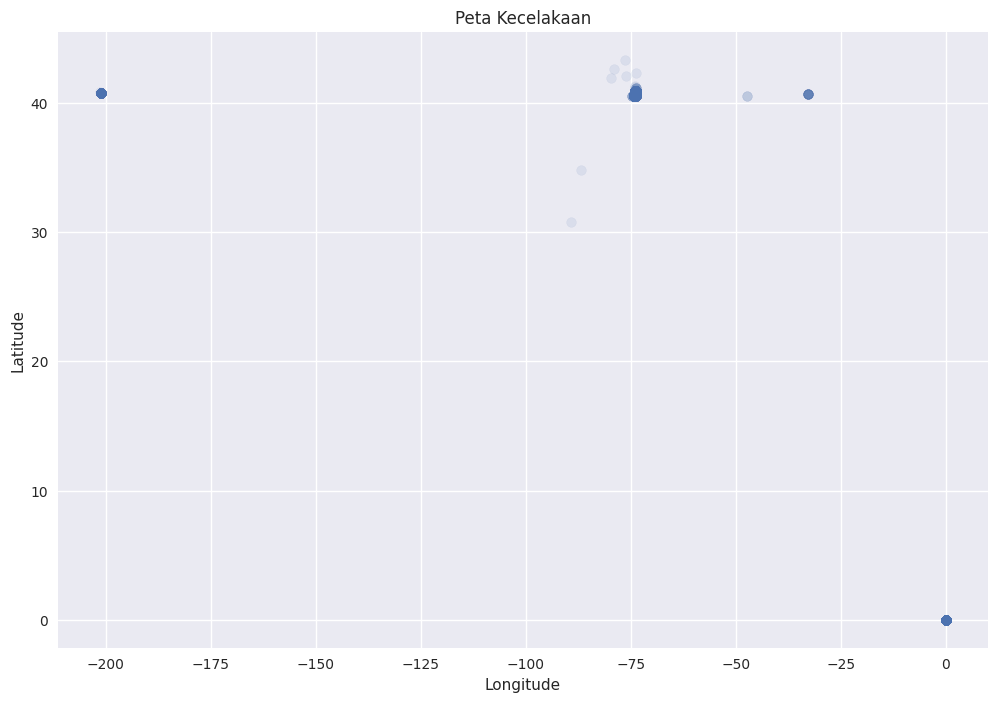

/tmp/ipykernel_3741/198991182.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CRASH HOUR'] = pd.to_datetime(df['CRASH TIME']).dt.hour


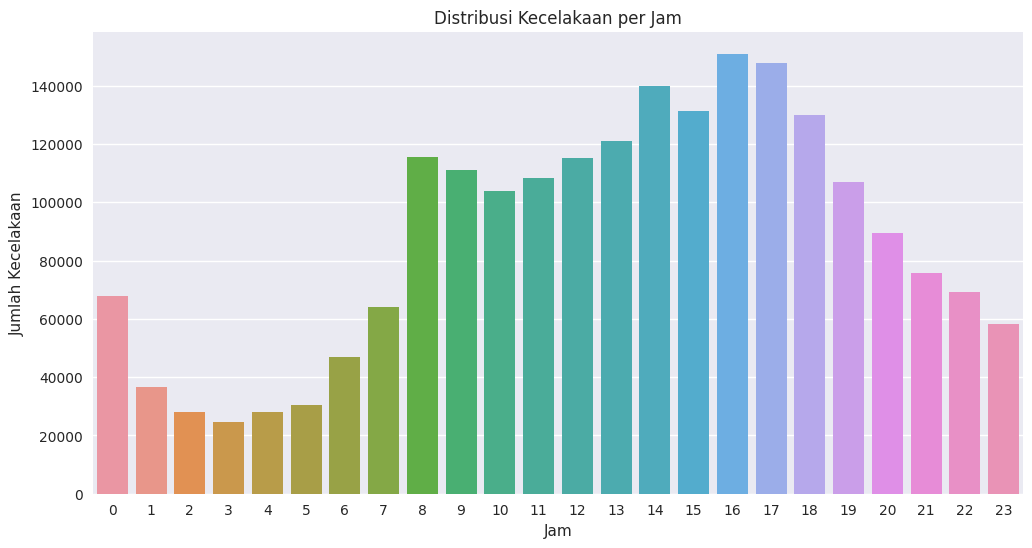

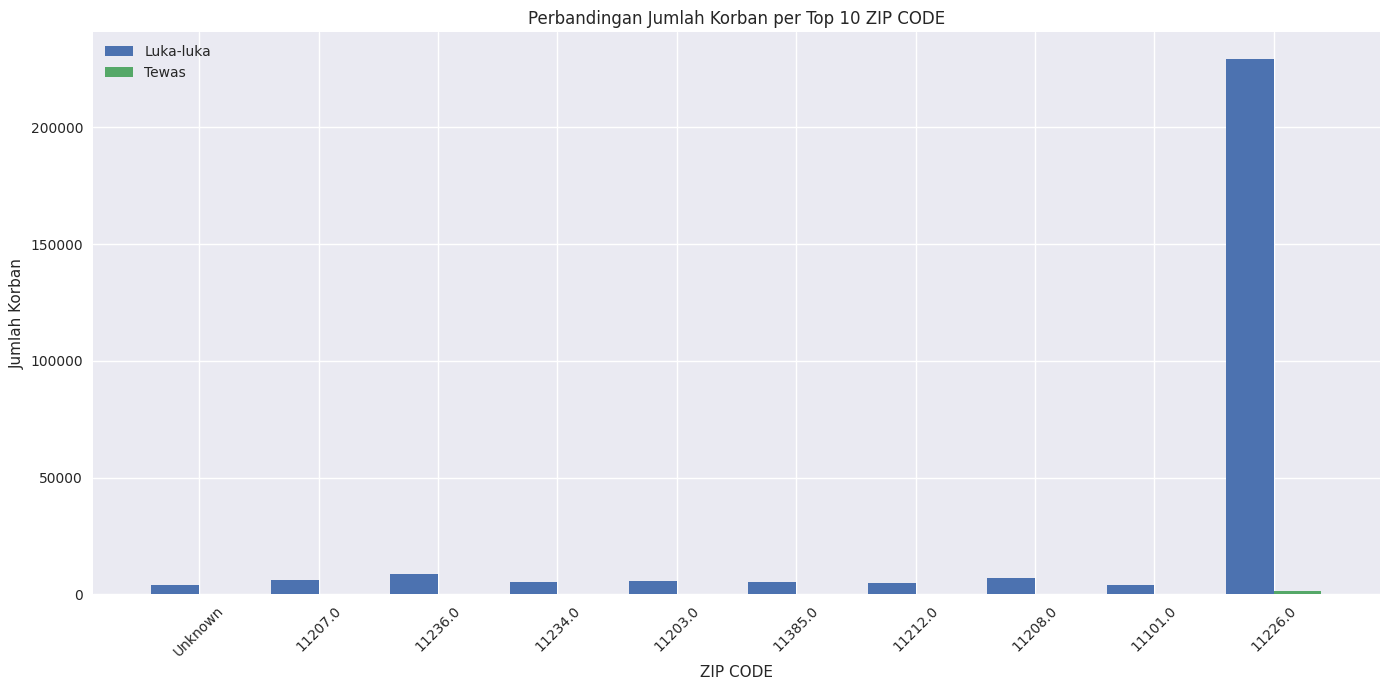

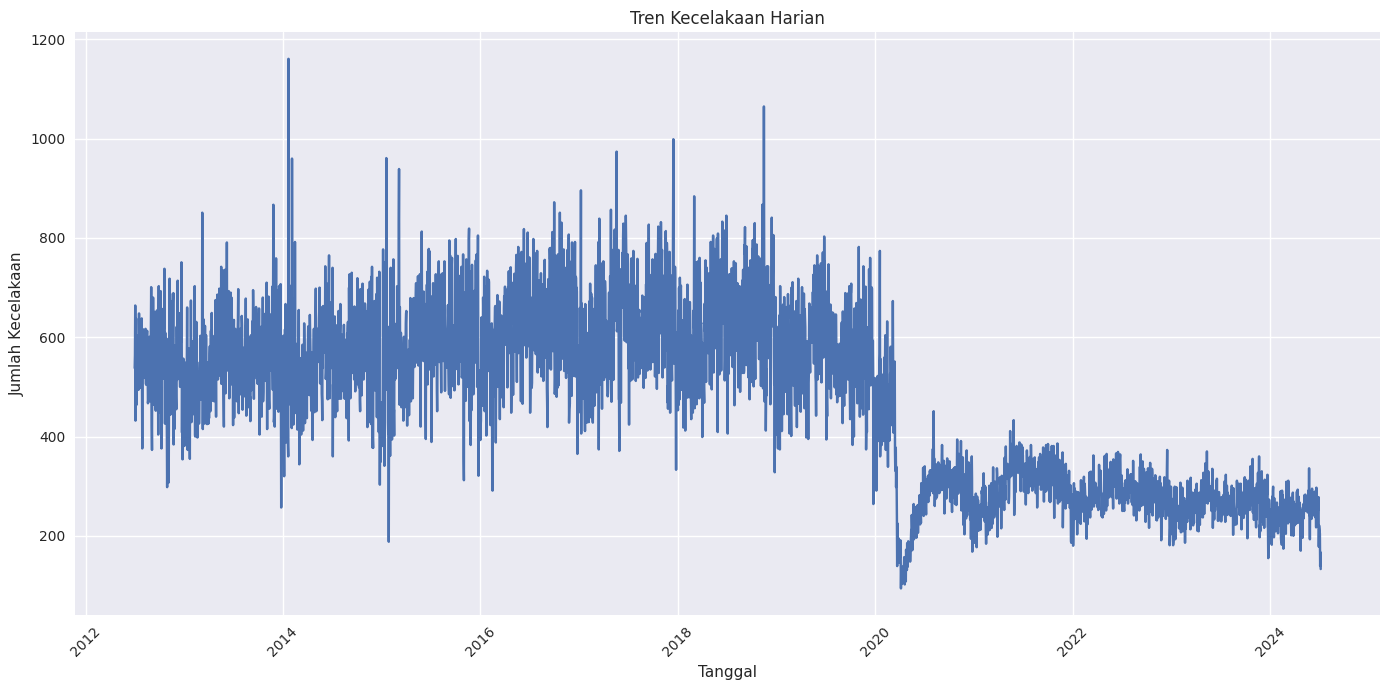

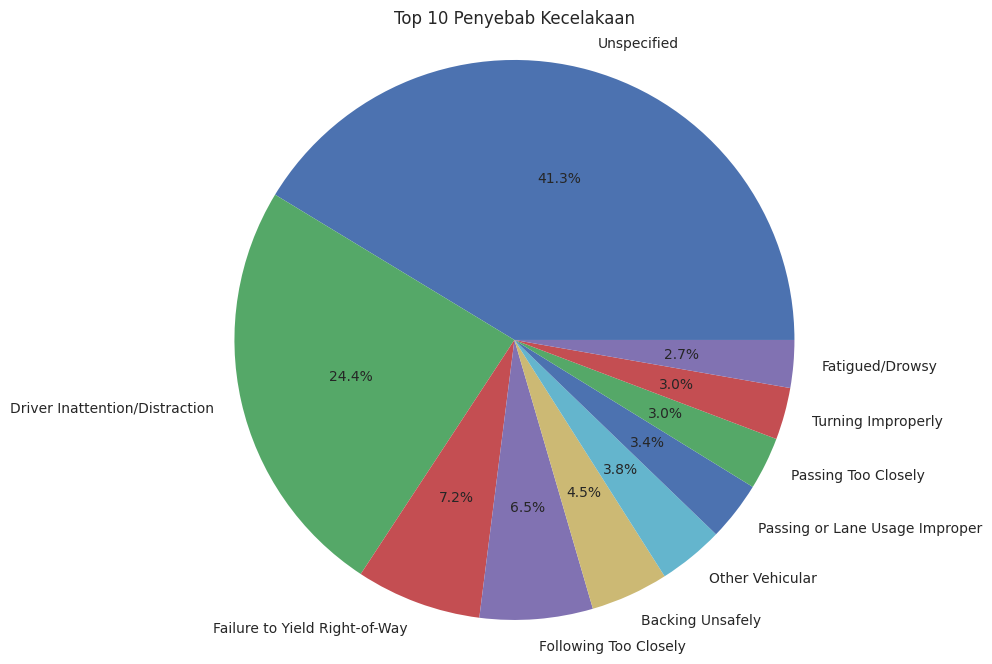

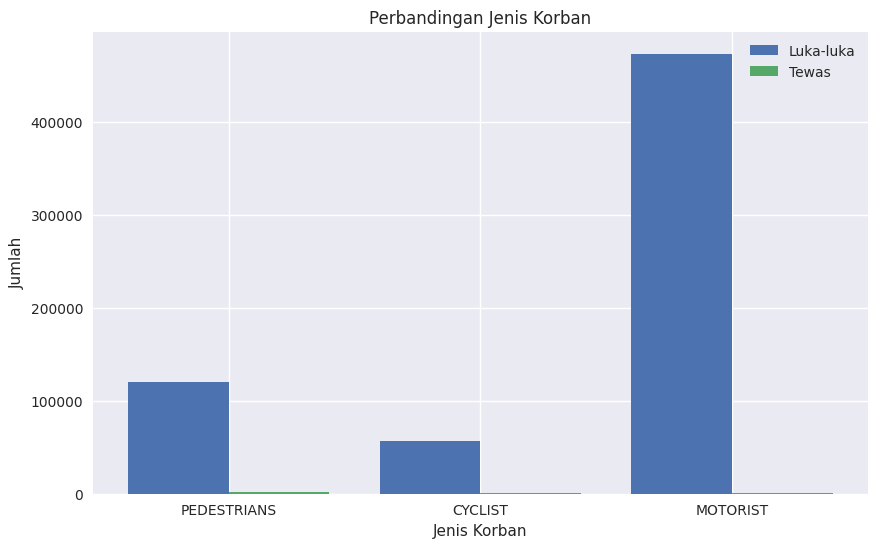

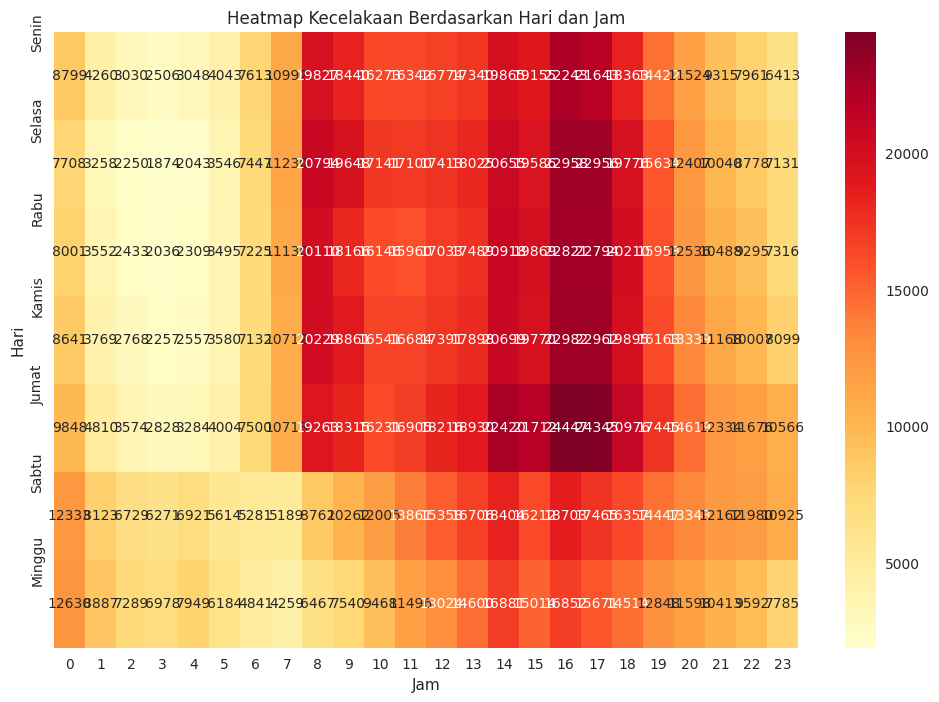

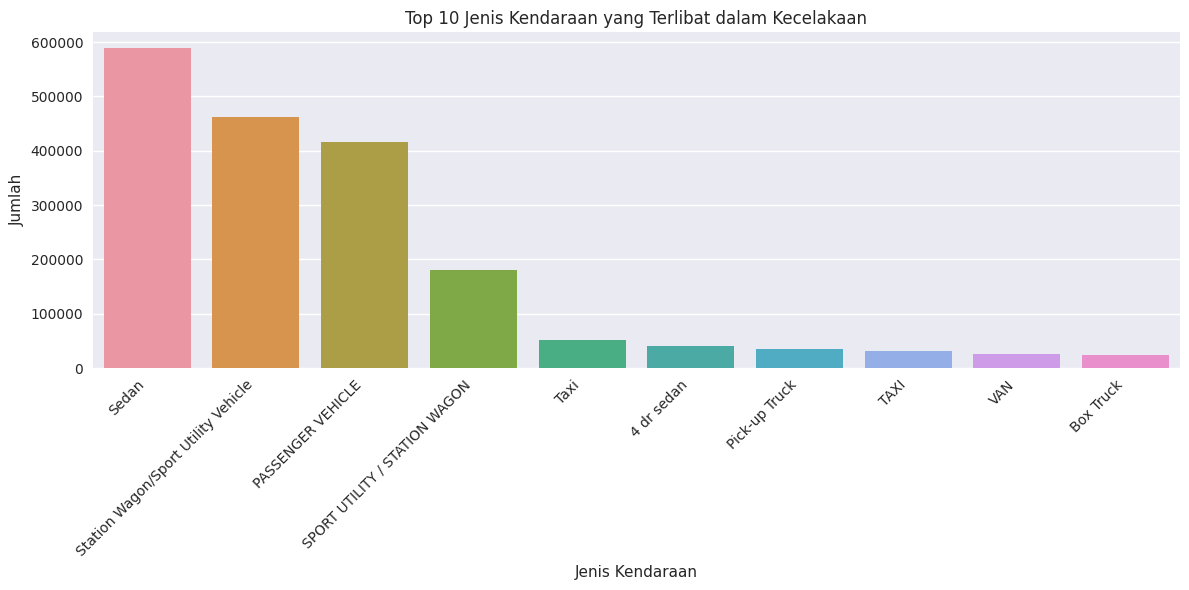

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Asumsikan df adalah DataFrame Anda
# df = pd.read_csv('your_data.csv')

# Mengatur style plot
plt.style.use('seaborn')

# 1. Peta Kecelakaan (Scatter plot)
plt.figure(figsize=(12, 8))
plt.scatter(df['LONGITUDE'], df['LATITUDE'], alpha=0.1)
plt.title('Peta Kecelakaan')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# 2. Distribusi Kecelakaan per Jam
df['CRASH HOUR'] = pd.to_datetime(df['CRASH TIME']).dt.hour
hourly_crashes = df['CRASH HOUR'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_crashes.index, y=hourly_crashes.values)
plt.title('Distribusi Kecelakaan per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Kecelakaan')
plt.show()

# 3. Perbandingan Jumlah Korban Luka dan Tewas berdasarkan ZIP CODE
top_zip_codes = df['ZIP CODE'].value_counts().nlargest(10).index
df_top = df[df['ZIP CODE'].isin(top_zip_codes)]

plt.figure(figsize=(14, 7))
x = range(len(top_zip_codes))
plt.bar([i-0.2 for i in x], df_top.groupby('ZIP CODE')['NUMBER OF PERSONS INJURED'].sum(), width=0.4, label='Luka-luka', align='center')
plt.bar([i+0.2 for i in x], df_top.groupby('ZIP CODE')['NUMBER OF PERSONS KILLED'].sum(), width=0.4, label='Tewas', align='center')
plt.title('Perbandingan Jumlah Korban per Top 10 ZIP CODE')
plt.xlabel('ZIP CODE')
plt.ylabel('Jumlah Korban')
plt.xticks(x, top_zip_codes, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 4. Tren Kecelakaan Sepanjang Waktu
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
daily_crashes = df.groupby('CRASH DATE').size().reset_index(name='count')

plt.figure(figsize=(14, 7))
plt.plot(daily_crashes['CRASH DATE'], daily_crashes['count'])
plt.title('Tren Kecelakaan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kecelakaan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5. Top 10 Penyebab Kecelakaan
top_factors = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().nlargest(10)

plt.figure(figsize=(12, 8))
plt.pie(top_factors.values, labels=top_factors.index, autopct='%1.1f%%')
plt.title('Top 10 Penyebab Kecelakaan')
plt.axis('equal')
plt.show()

# 6. Perbandingan Jenis Korban
victims = ['PEDESTRIANS', 'CYCLIST', 'MOTORIST']
injured = [df[f'NUMBER OF {v} INJURED'].sum() for v in victims]
killed = [df[f'NUMBER OF {v} KILLED'].sum() for v in victims]

plt.figure(figsize=(10, 6))
x = range(len(victims))
plt.bar([i-0.2 for i in x], injured, width=0.4, label='Luka-luka', align='center')
plt.bar([i+0.2 for i in x], killed, width=0.4, label='Tewas', align='center')
plt.title('Perbandingan Jenis Korban')
plt.xlabel('Jenis Korban')
plt.ylabel('Jumlah')
plt.xticks(x, victims)
plt.legend()
plt.show()

# 7. Heatmap Kecelakaan Berdasarkan Hari dan Jam
df['CRASH DAY'] = pd.to_datetime(df['CRASH DATE']).dt.dayofweek
heatmap_data = df.groupby(['CRASH DAY', 'CRASH HOUR']).size().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='g')
plt.title('Heatmap Kecelakaan Berdasarkan Hari dan Jam')
plt.xlabel('Jam')
plt.ylabel('Hari')
plt.yticks(range(7), ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.show()

# 8. Distribusi Jenis Kendaraan yang Terlibat
vehicle_types = df['VEHICLE TYPE CODE 1'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=vehicle_types.index, y=vehicle_types.values)
plt.title('Top 10 Jenis Kendaraan yang Terlibat dalam Kecelakaan')
plt.xlabel('Jenis Kendaraan')
plt.ylabel('Jumlah')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/tmp/ipykernel_3741/754008656.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


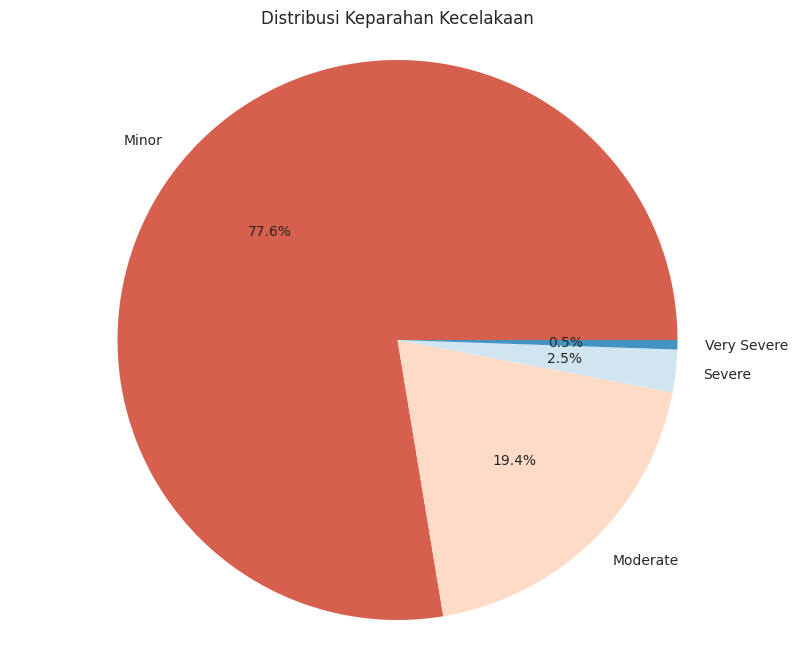

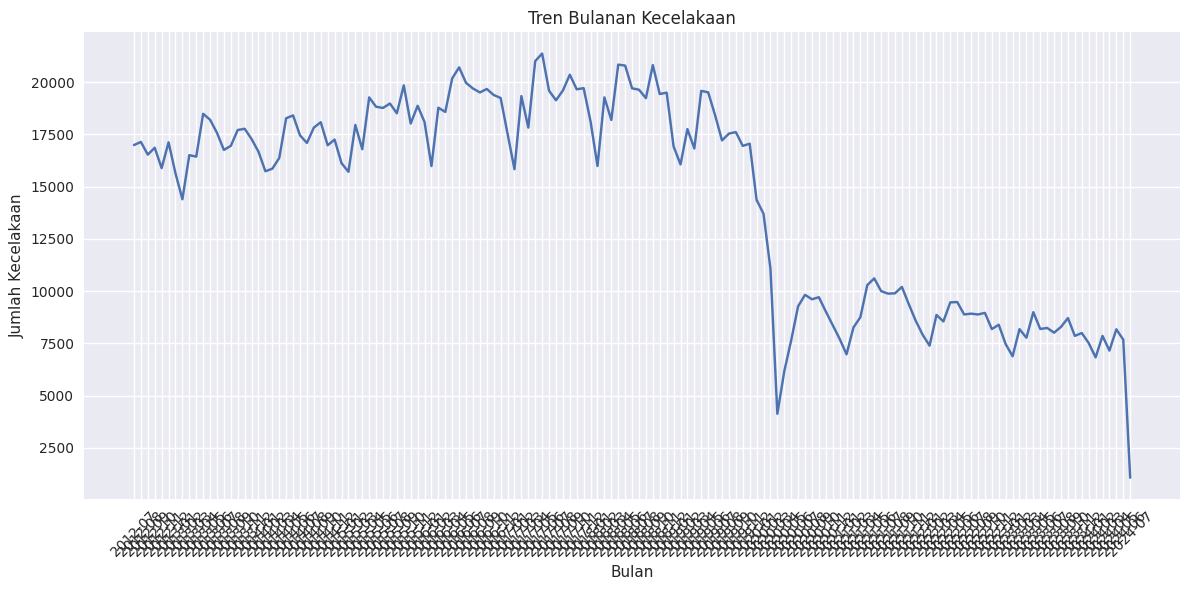

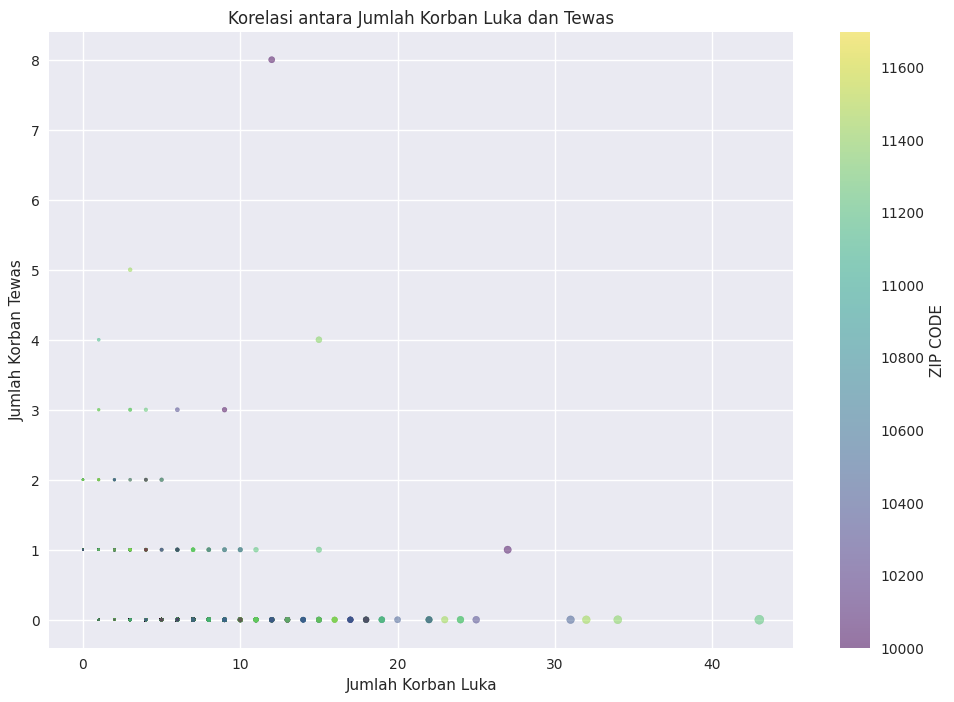

/tmp/ipykernel_3741/754008656.py:59: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['CRASH TIME']).dt.hour
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


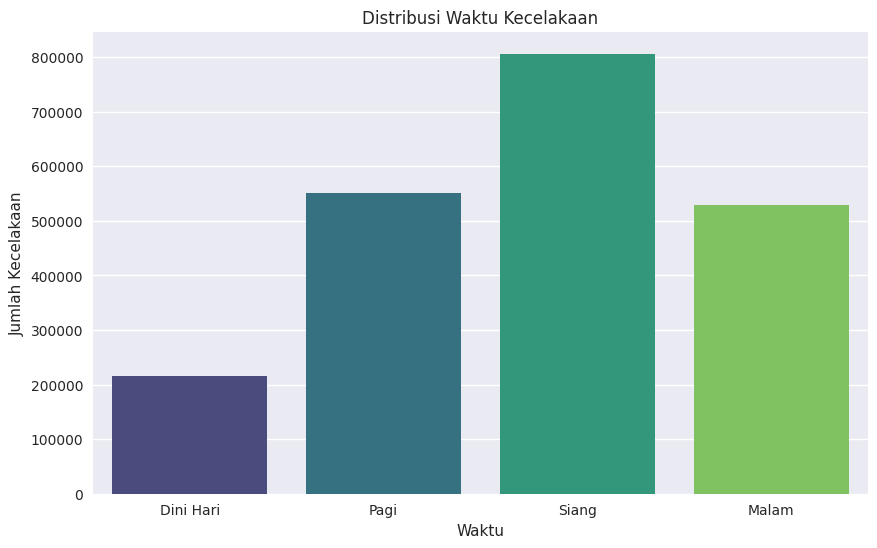

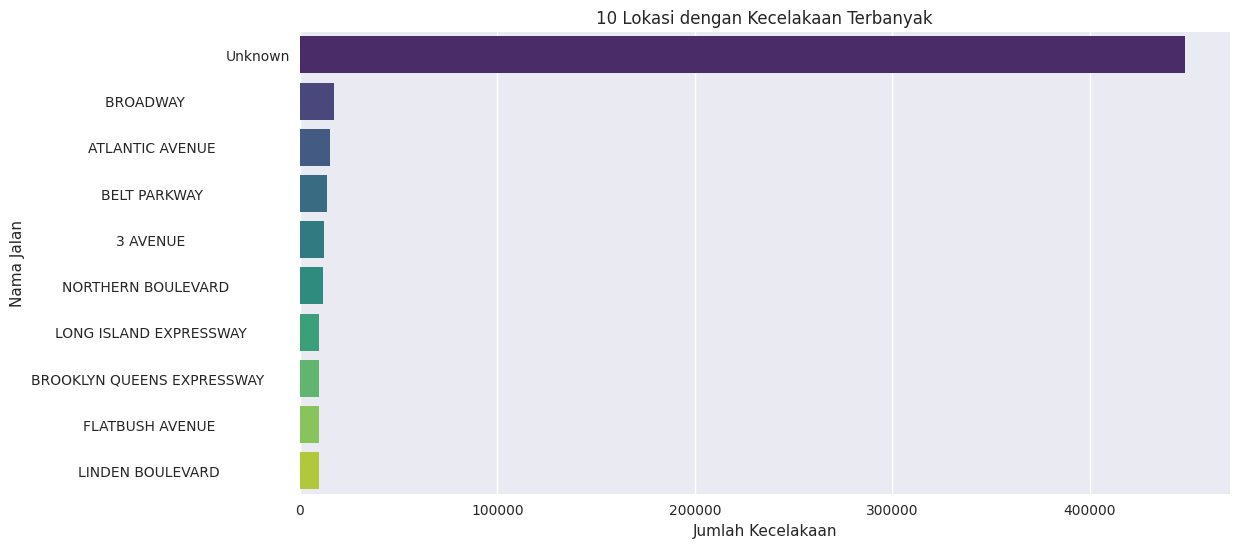

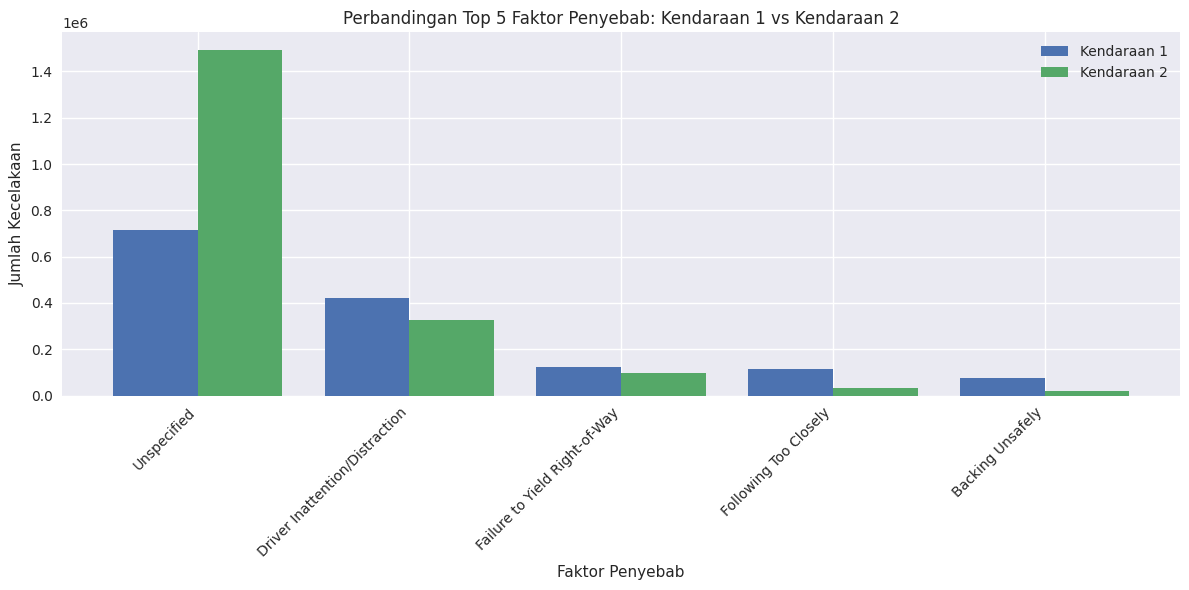

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Asumsikan df adalah DataFrame Anda
# df = pd.read_csv('your_data.csv')

plt.style.use('seaborn')

# 1. Distribusi Keparahan Kecelakaan
df['Total Victims'] = df['NUMBER OF PERSONS INJURED'] + df['NUMBER OF PERSONS KILLED']
df['Severity'] = pd.cut(df['Total Victims'], bins=[0, 1, 3, 5, float('inf')], 
                        labels=['Minor', 'Moderate', 'Severe', 'Very Severe'])
severity_counts = df['Severity'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(severity_counts.values, labels=severity_counts.index, autopct='%1.1f%%', 
        colors=sns.color_palette("RdBu", n_colors=4))
plt.title('Distribusi Keparahan Kecelakaan')
plt.axis('equal')
plt.show()

# 2. Tren Bulanan Kecelakaan
df['Month'] = pd.to_datetime(df['CRASH DATE']).dt.to_period('M')
monthly_crashes = df.groupby('Month').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
plt.plot(monthly_crashes['Month'].astype(str), monthly_crashes['count'])
plt.title('Tren Bulanan Kecelakaan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kecelakaan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Korelasi antara Jumlah Korban Luka dan Tewas
plt.figure(figsize=(12, 8))

# Konversi ZIP CODE ke numerik, ganti 'Unknown' dengan NaN
df['ZIP CODE'] = pd.to_numeric(df['ZIP CODE'], errors='coerce')

# Buat scatter plot
scatter = plt.scatter(df['NUMBER OF PERSONS INJURED'], df['NUMBER OF PERSONS KILLED'], 
                      alpha=0.5, c=df['ZIP CODE'], cmap='viridis', 
                      s=df['Total Victims'], norm=plt.Normalize(vmin=df['ZIP CODE'].min(), vmax=df['ZIP CODE'].max()))

plt.title('Korelasi antara Jumlah Korban Luka dan Tewas')
plt.xlabel('Jumlah Korban Luka')
plt.ylabel('Jumlah Korban Tewas')

# Tambahkan colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('ZIP CODE')

plt.show()

# 4. Perbandingan Waktu Kecelakaan (Siang vs Malam)
df['Hour'] = pd.to_datetime(df['CRASH TIME']).dt.hour
df['Day/Night'] = pd.cut(df['Hour'], bins=[-1, 5, 11, 17, 23], 
                         labels=['Dini Hari', 'Pagi', 'Siang', 'Malam'])
time_distribution = df['Day/Night'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=time_distribution.index, y=time_distribution.values, palette='viridis')
plt.title('Distribusi Waktu Kecelakaan')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Kecelakaan')
plt.show()

# 5. Top 10 Lokasi Kecelakaan
top_locations = df['ON STREET NAME'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')
plt.title('10 Lokasi dengan Kecelakaan Terbanyak')
plt.xlabel('Jumlah Kecelakaan')
plt.ylabel('Nama Jalan')
plt.show()

# 6. Perbandingan Faktor Penyebab untuk Kendaraan 1 dan 2
factors_v1 = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().nlargest(5)
factors_v2 = df['CONTRIBUTING FACTOR VEHICLE 2'].value_counts().nlargest(5)

plt.figure(figsize=(12, 6))
x = range(len(factors_v1))
plt.bar([i - 0.2 for i in x], factors_v1.values, width=0.4, label='Kendaraan 1', align='center')
plt.bar([i + 0.2 for i in x], factors_v2.values, width=0.4, label='Kendaraan 2', align='center')
plt.title('Perbandingan Top 5 Faktor Penyebab: Kendaraan 1 vs Kendaraan 2')
plt.xlabel('Faktor Penyebab')
plt.ylabel('Jumlah Kecelakaan')
plt.xticks(x, factors_v1.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipykernel_3741/2560489577.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


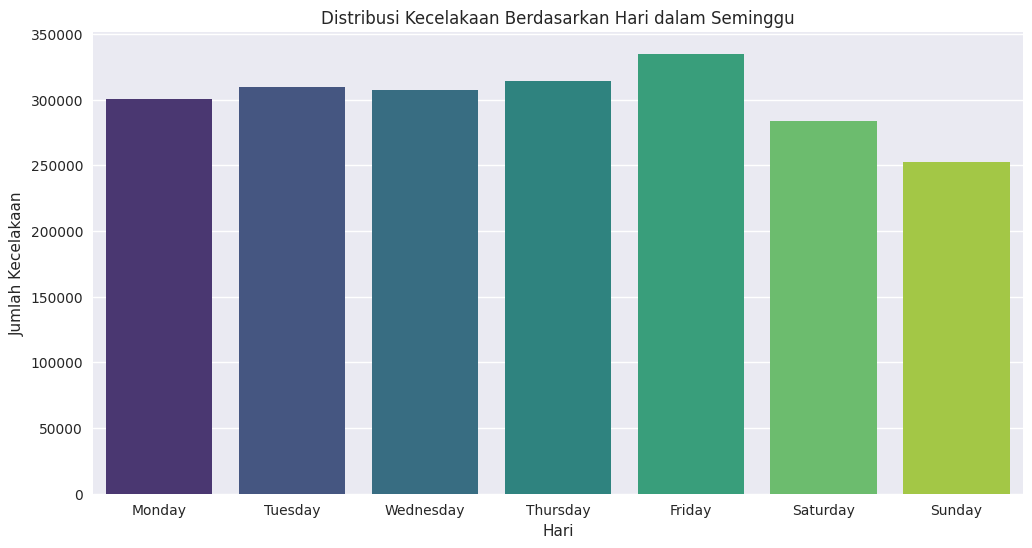

/tmp/ipykernel_3741/2560489577.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['CRASH TIME']).dt.hour


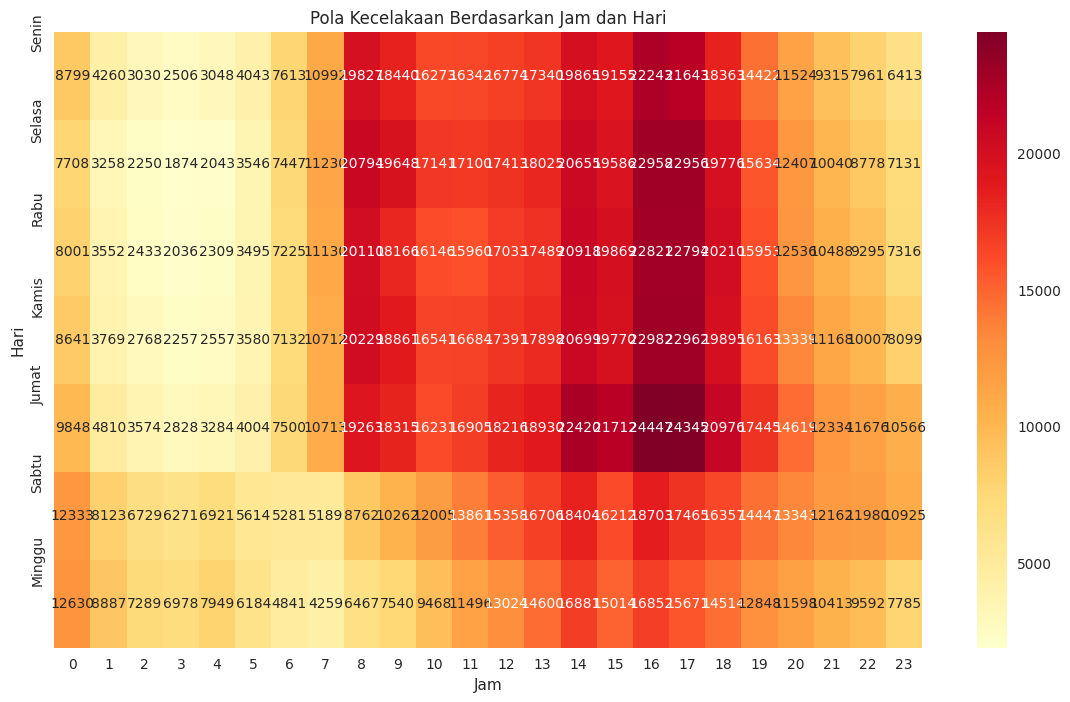

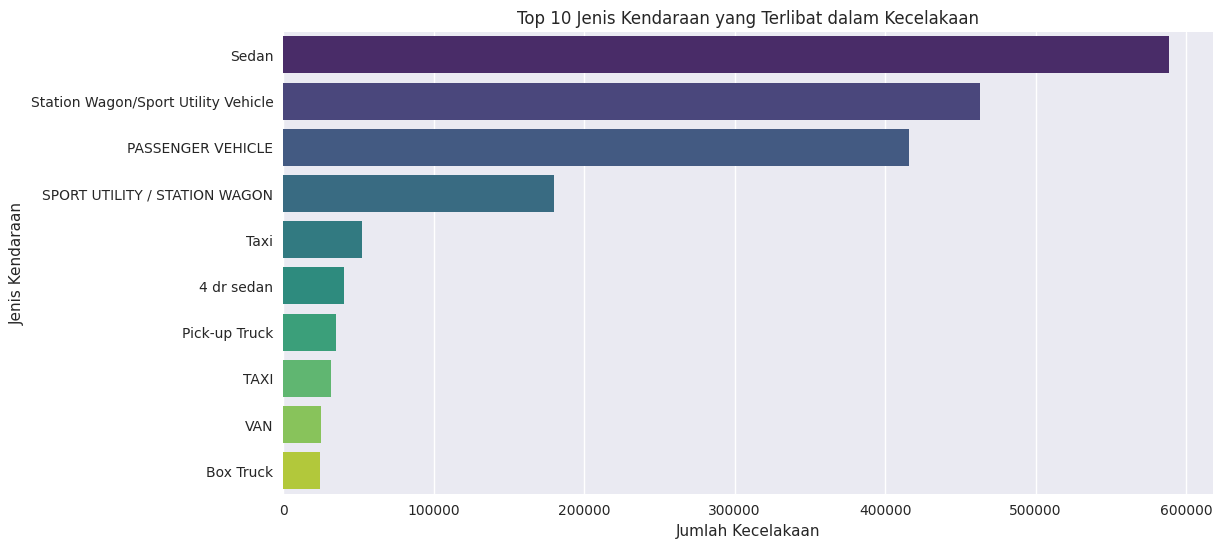

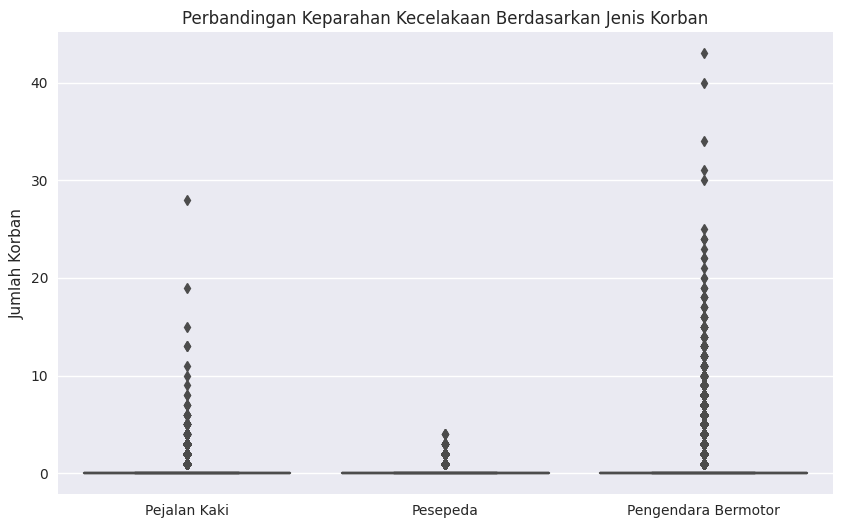

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


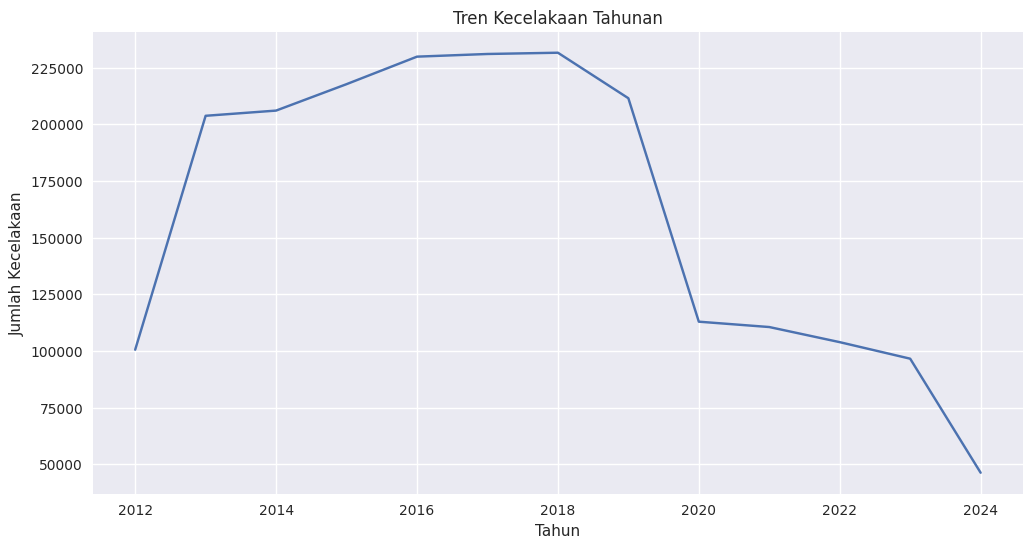

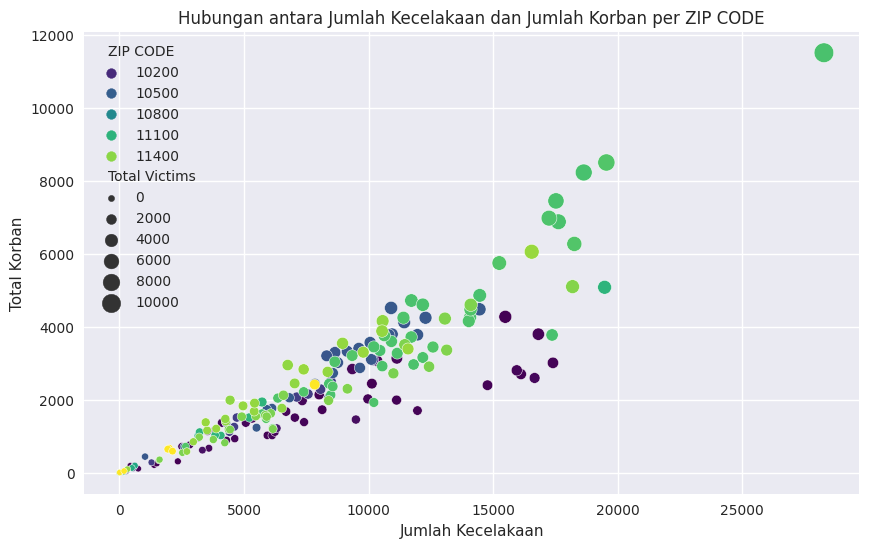

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Asumsikan df adalah DataFrame Anda
# df = pd.read_csv('your_data.csv')

plt.style.use('seaborn')

# 1. Distribusi Kecelakaan Berdasarkan Hari dalam Seminggu
df['Day of Week'] = pd.to_datetime(df['CRASH DATE']).dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['Day of Week'].value_counts().reindex(day_order)

plt.figure(figsize=(12, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')
plt.title('Distribusi Kecelakaan Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('Jumlah Kecelakaan')
plt.show()

# 2. Pola Kecelakaan Berdasarkan Jam dan Hari
df['Hour'] = pd.to_datetime(df['CRASH TIME']).dt.hour
df['Day of Week'] = pd.to_datetime(df['CRASH DATE']).dt.dayofweek
heatmap_data = df.groupby(['Day of Week', 'Hour']).size().unstack()

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=True, fmt='g')
plt.title('Pola Kecelakaan Berdasarkan Jam dan Hari')
plt.xlabel('Jam')
plt.ylabel('Hari')
plt.yticks(range(7), ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.show()

# 3. Distribusi Jenis Kendaraan yang Terlibat
vehicle_types = df['VEHICLE TYPE CODE 1'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=vehicle_types.values, y=vehicle_types.index, palette='viridis')
plt.title('Top 10 Jenis Kendaraan yang Terlibat dalam Kecelakaan')
plt.xlabel('Jumlah Kecelakaan')
plt.ylabel('Jenis Kendaraan')
plt.show()

# 4. Perbandingan Keparahan Kecelakaan Berdasarkan Jenis Korban
df['Pedestrian Victims'] = df['NUMBER OF PEDESTRIANS INJURED'] + df['NUMBER OF PEDESTRIANS KILLED']
df['Cyclist Victims'] = df['NUMBER OF CYCLIST INJURED'] + df['NUMBER OF CYCLIST KILLED']
df['Motorist Victims'] = df['NUMBER OF MOTORIST INJURED'] + df['NUMBER OF MOTORIST KILLED']

plt.figure(figsize=(10, 6))
sns.boxplot(data=[df['Pedestrian Victims'], df['Cyclist Victims'], df['Motorist Victims']])
plt.title('Perbandingan Keparahan Kecelakaan Berdasarkan Jenis Korban')
plt.xticks([0, 1, 2], ['Pejalan Kaki', 'Pesepeda', 'Pengendara Bermotor'])
plt.ylabel('Jumlah Korban')
plt.show()

# 5. Tren Kecelakaan Tahunan
df['Year'] = pd.to_datetime(df['CRASH DATE']).dt.year
yearly_crashes = df.groupby('Year').size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_crashes, x='Year', y='count')
plt.title('Tren Kecelakaan Tahunan')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kecelakaan')
plt.show()

# 6. Hubungan antara Jumlah Kecelakaan dan Jumlah Korban per ZIP CODE
zip_stats = df.groupby('ZIP CODE').agg({
    'COLLISION_ID': 'count',
    'NUMBER OF PERSONS INJURED': 'sum',
    'NUMBER OF PERSONS KILLED': 'sum'
}).reset_index()
zip_stats['Total Victims'] = zip_stats['NUMBER OF PERSONS INJURED'] + zip_stats['NUMBER OF PERSONS KILLED']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=zip_stats, x='COLLISION_ID', y='Total Victims', hue='ZIP CODE', palette='viridis', size='Total Victims', sizes=(20, 200))
plt.title('Hubungan antara Jumlah Kecelakaan dan Jumlah Korban per ZIP CODE')
plt.xlabel('Jumlah Kecelakaan')
plt.ylabel('Total Korban')
plt.show()

In [14]:
!pip install statsmodels

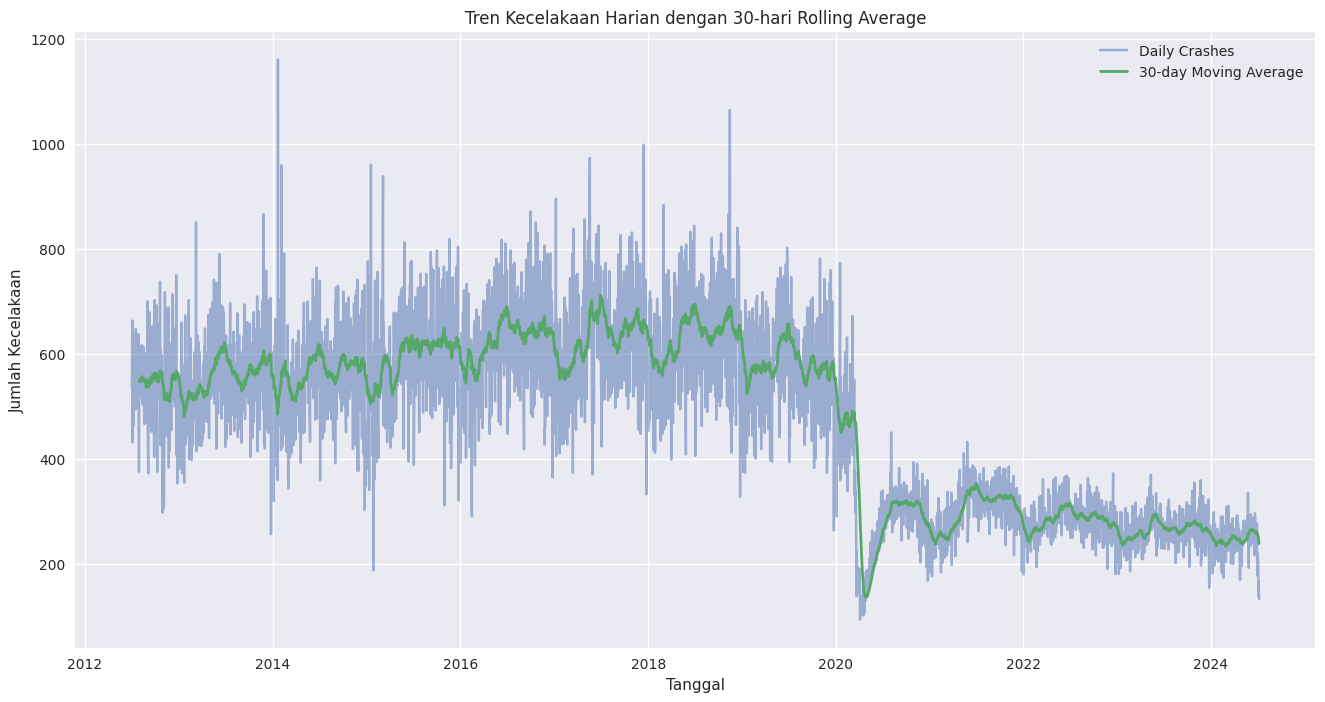

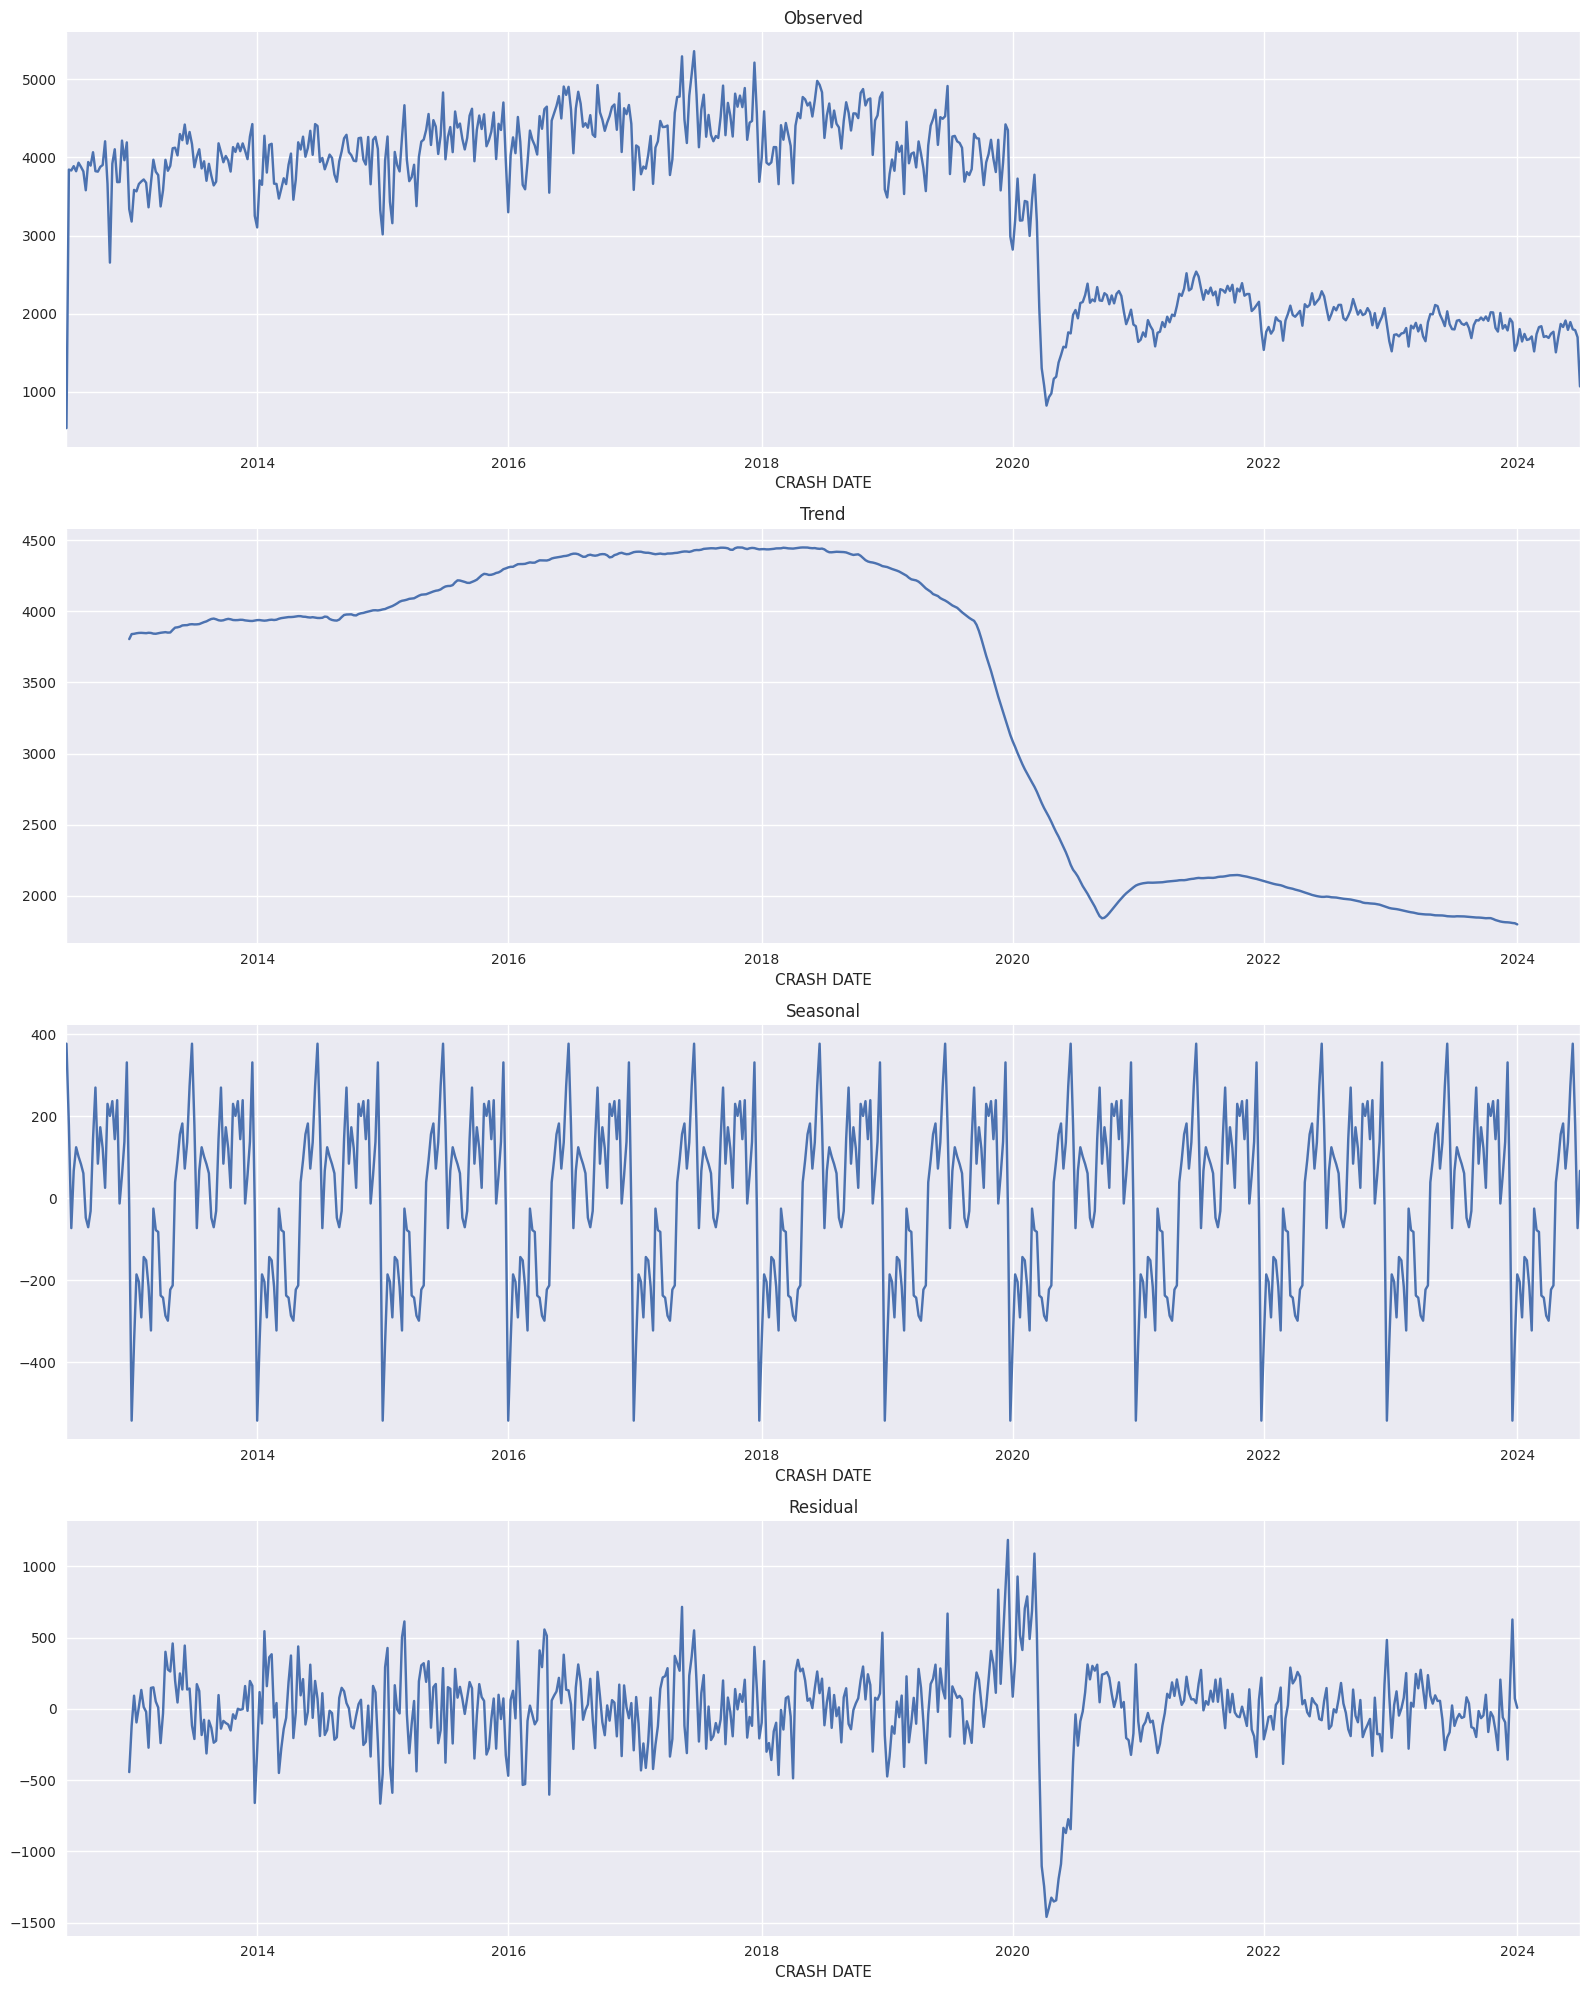

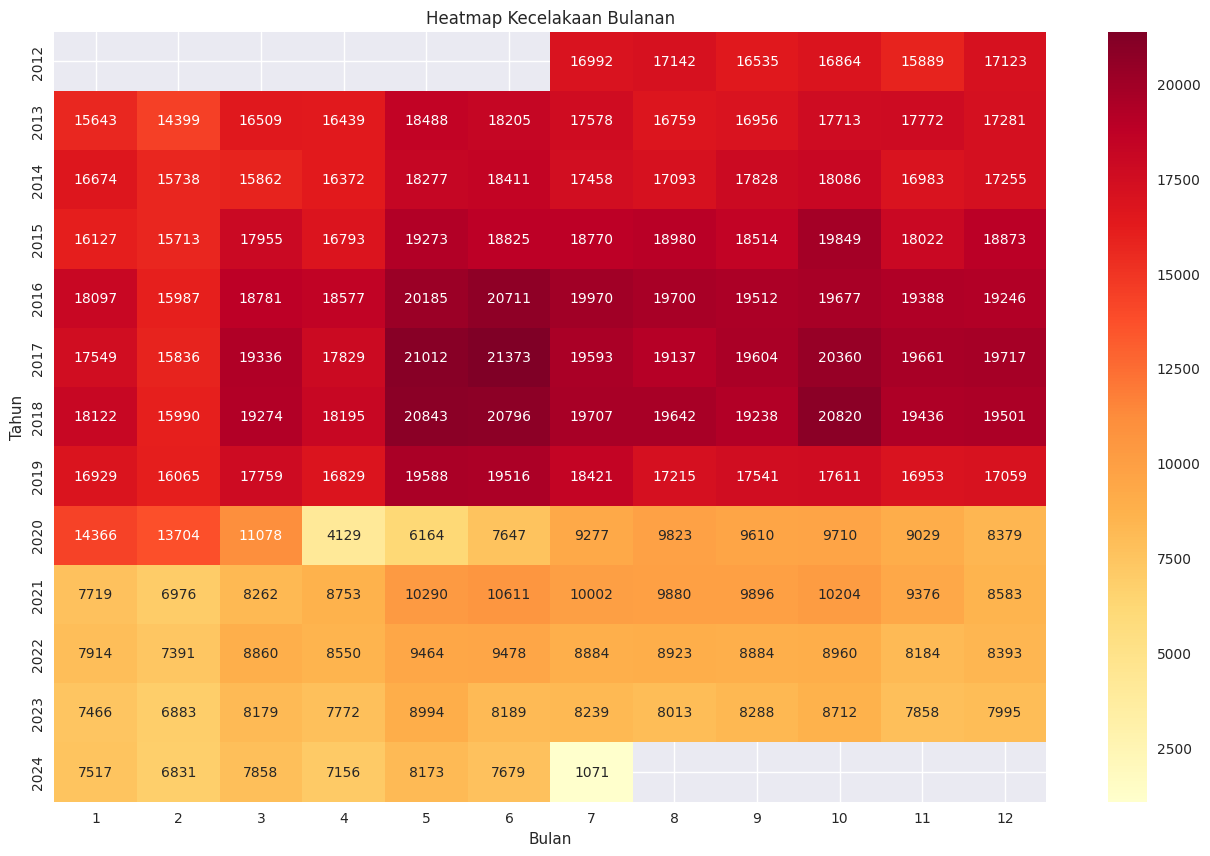

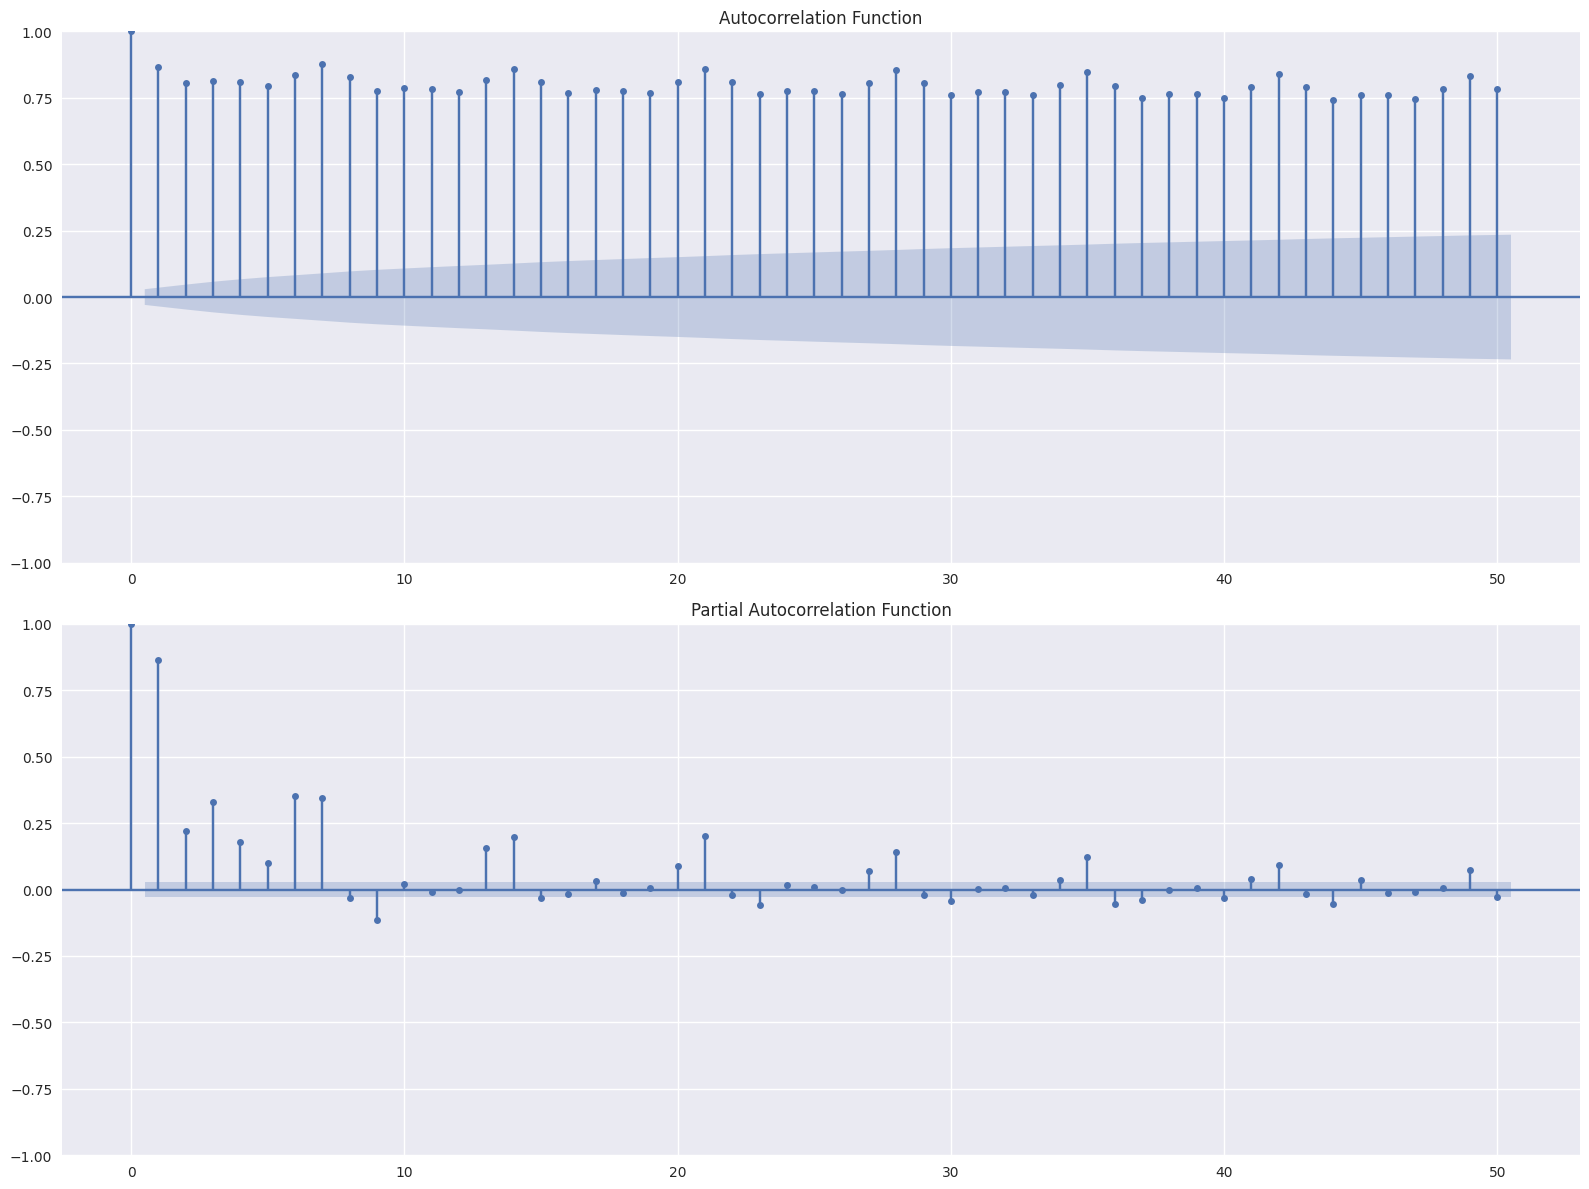

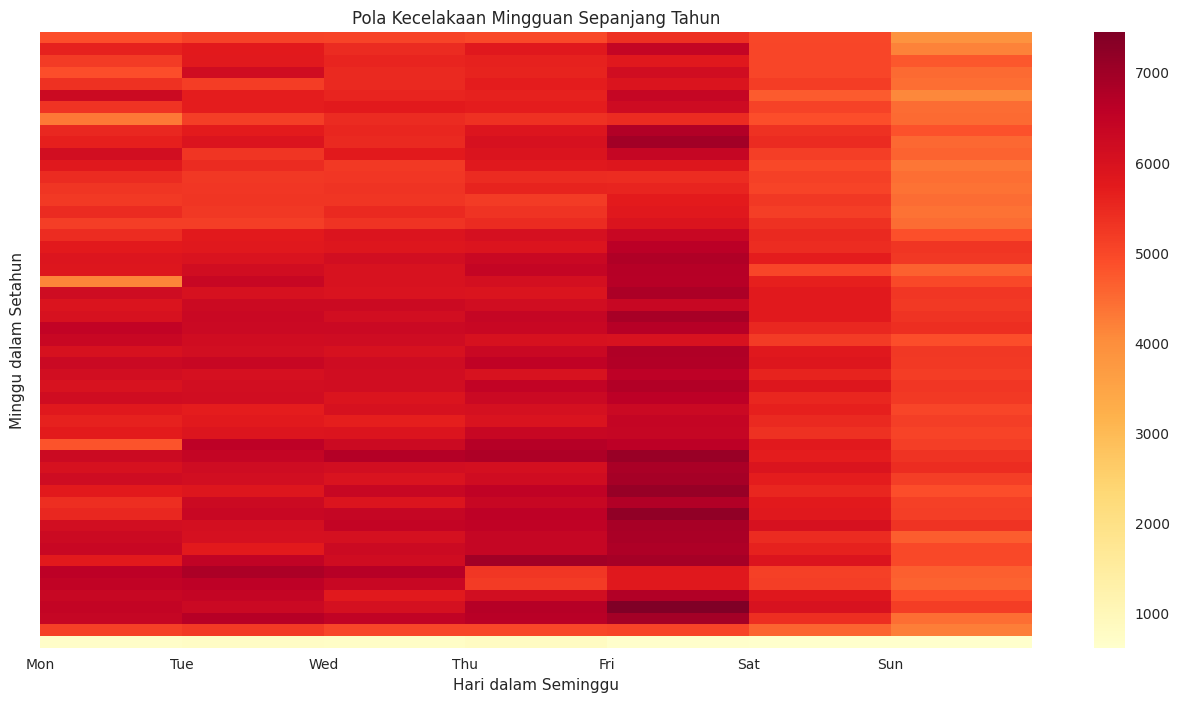

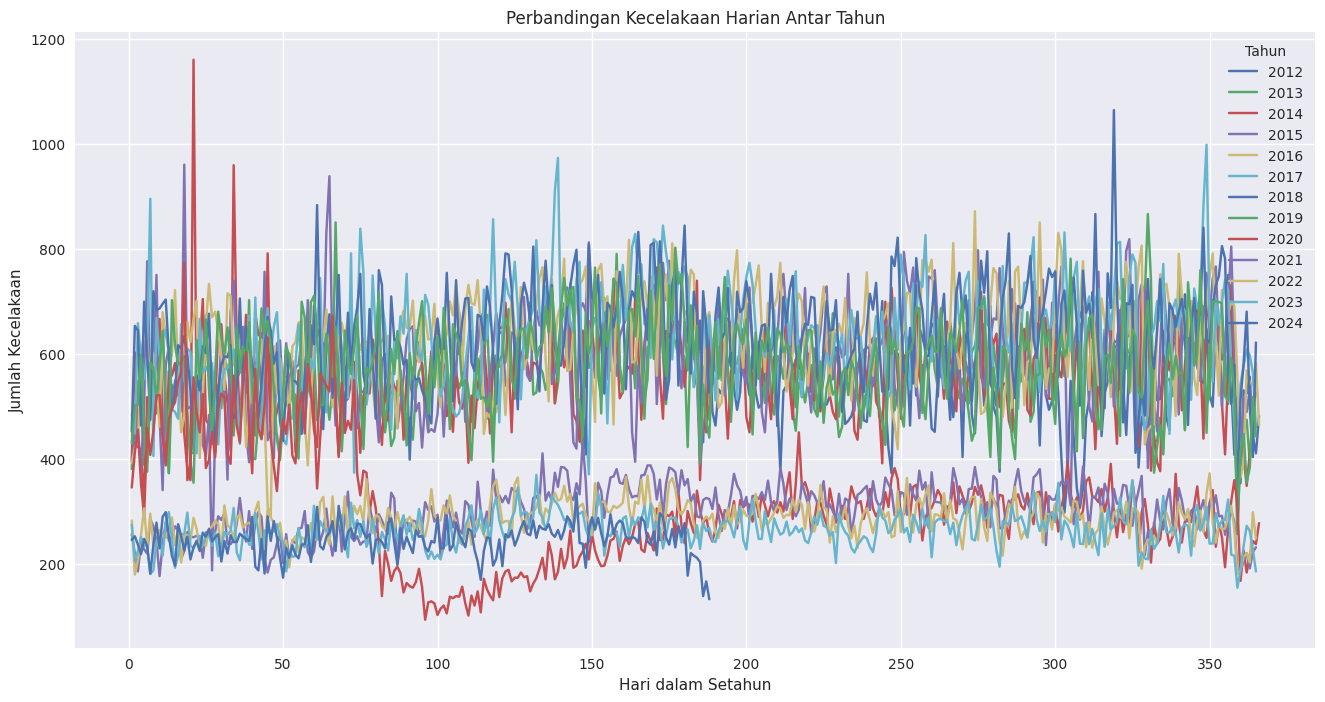

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import calendar

# Asumsikan df adalah DataFrame Anda
# df = pd.read_csv('your_data.csv')

# Konversi CRASH DATE ke datetime
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# 1. Tren Kecelakaan Harian dengan Rolling Average
daily_crashes = df.groupby('CRASH DATE').size().reset_index(name='count')
daily_crashes.set_index('CRASH DATE', inplace=True)

plt.figure(figsize=(16, 8))
plt.plot(daily_crashes.index, daily_crashes['count'], label='Daily Crashes', alpha=0.5)
plt.plot(daily_crashes.index, daily_crashes['count'].rolling(window=30).mean(), label='30-day Moving Average', linewidth=2)
plt.title('Tren Kecelakaan Harian dengan 30-hari Rolling Average')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kecelakaan')
plt.legend()
plt.show()

# 2. Dekomposisi Time Series
weekly_crashes = daily_crashes.resample('W').sum()
decomposition = seasonal_decompose(weekly_crashes, model='additive', period=52)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 20))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

# 3. Heatmap Kecelakaan Bulanan
df['Year'] = df['CRASH DATE'].dt.year
df['Month'] = df['CRASH DATE'].dt.month
monthly_crashes = df.groupby(['Year', 'Month']).size().unstack()

plt.figure(figsize=(16, 10))
sns.heatmap(monthly_crashes, cmap='YlOrRd', annot=True, fmt='g')
plt.title('Heatmap Kecelakaan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Tahun')
plt.show()

# 4. Autocorrelation dan Partial Autocorrelation
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))
plot_acf(daily_crashes['count'], ax=ax1, lags=50)
ax1.set_title('Autocorrelation Function')
plot_pacf(daily_crashes['count'], ax=ax2, lags=50)
ax2.set_title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

# 5. Pola Kecelakaan Mingguan
df['Day of Week'] = df['CRASH DATE'].dt.dayofweek
df['Week of Year'] = df['CRASH DATE'].dt.isocalendar().week
weekly_pattern = df.groupby(['Week of Year', 'Day of Week']).size().unstack()

plt.figure(figsize=(16, 8))
sns.heatmap(weekly_pattern, cmap='YlOrRd')
plt.title('Pola Kecelakaan Mingguan Sepanjang Tahun')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Minggu dalam Setahun')
plt.yticks(range(0, 53, 4))
plt.xticks(range(7), calendar.day_abbr)
plt.show()

# 6. Perbandingan Tahun ke Tahun
yearly_comparison = df.groupby([df['CRASH DATE'].dt.dayofyear, df['CRASH DATE'].dt.year]).size().unstack()

plt.figure(figsize=(16, 8))
for year in yearly_comparison.columns:
    plt.plot(yearly_comparison.index, yearly_comparison[year], label=str(year))
plt.title('Perbandingan Kecelakaan Harian Antar Tahun')
plt.xlabel('Hari dalam Setahun')
plt.ylabel('Jumlah Kecelakaan')
plt.legend(title='Tahun')
plt.show()

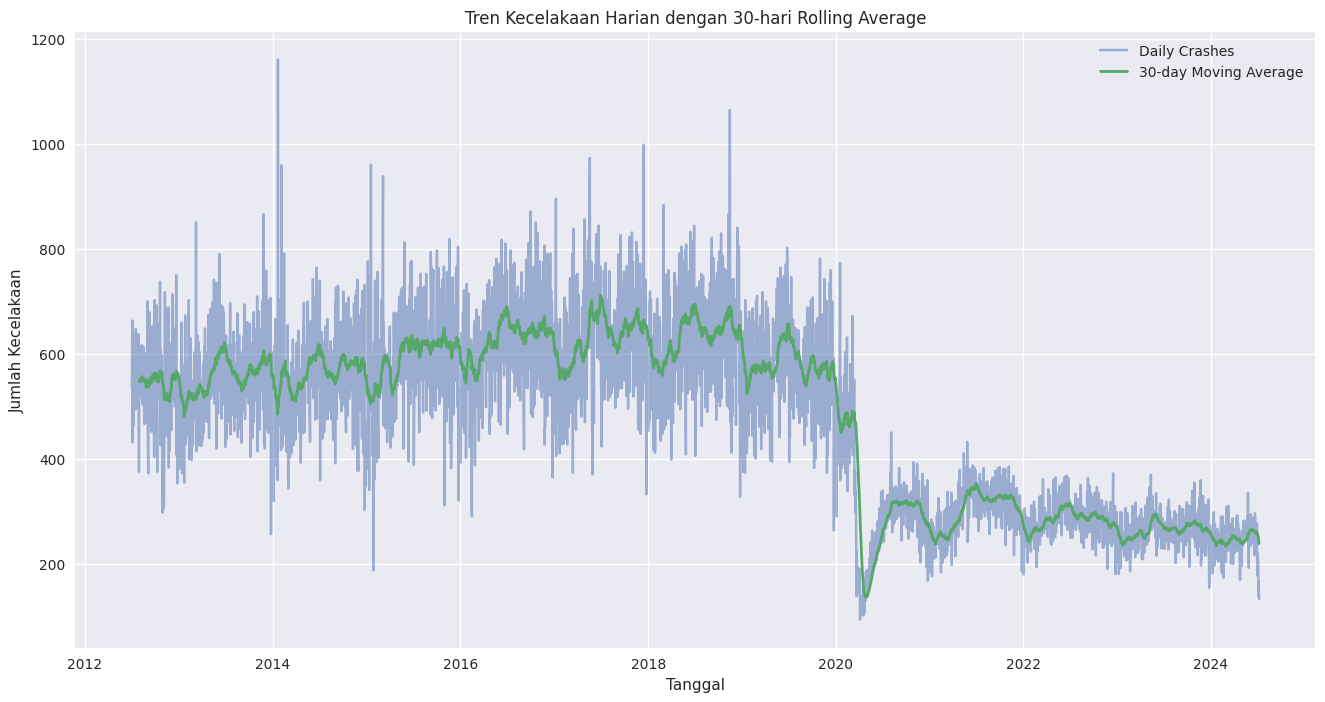

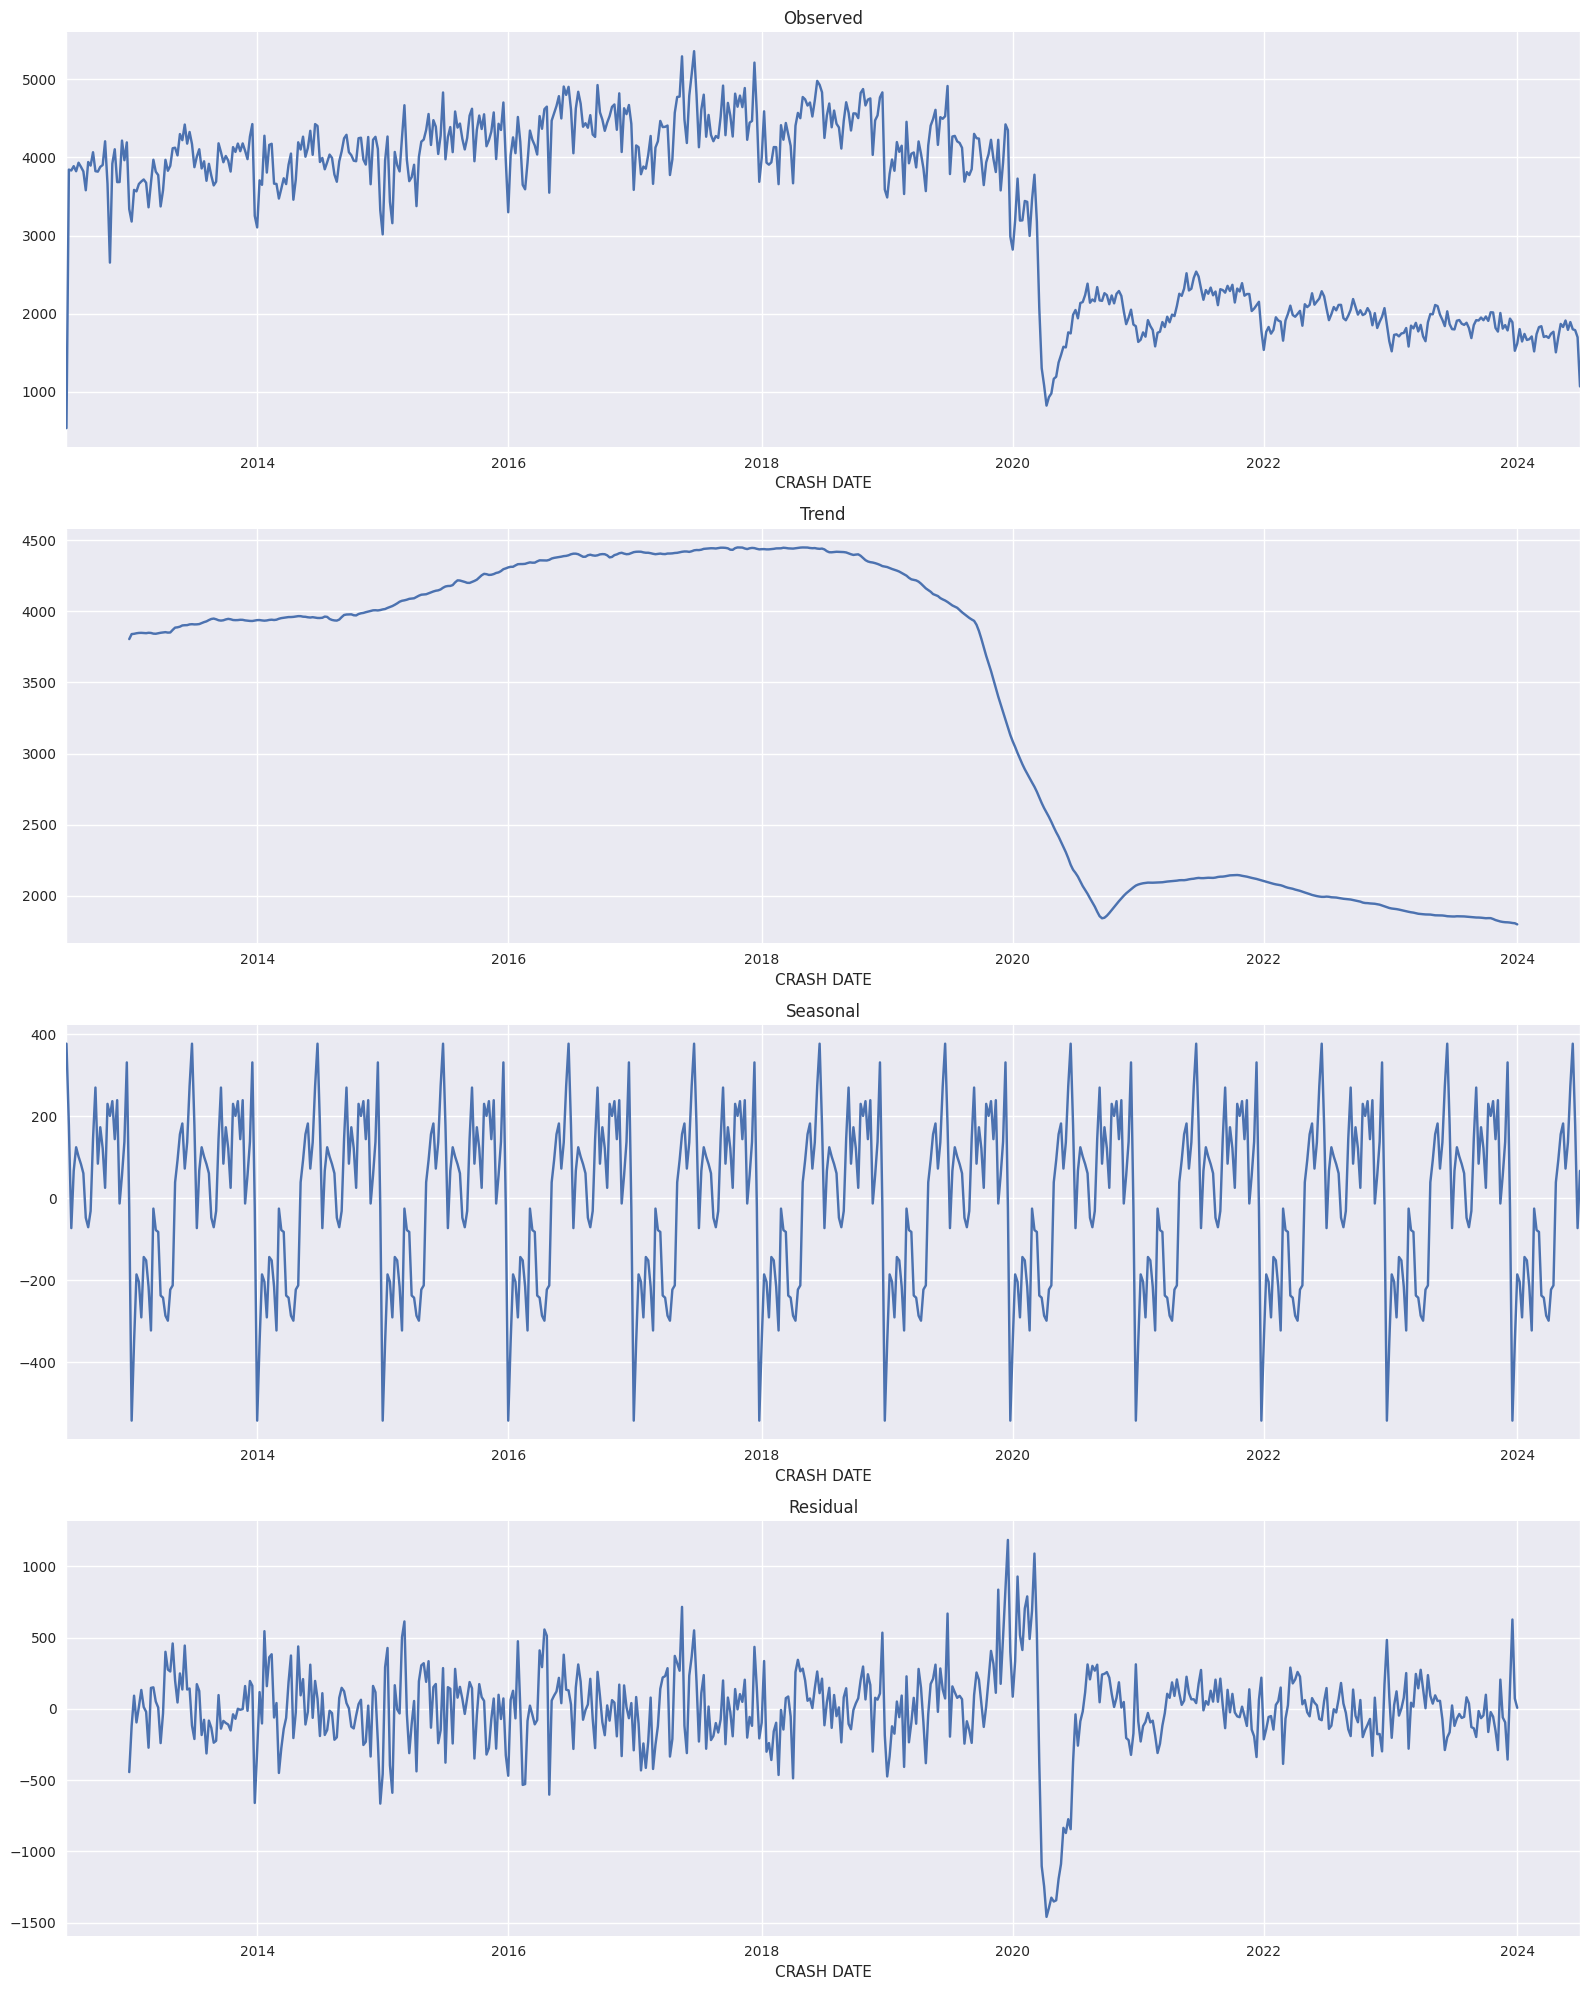

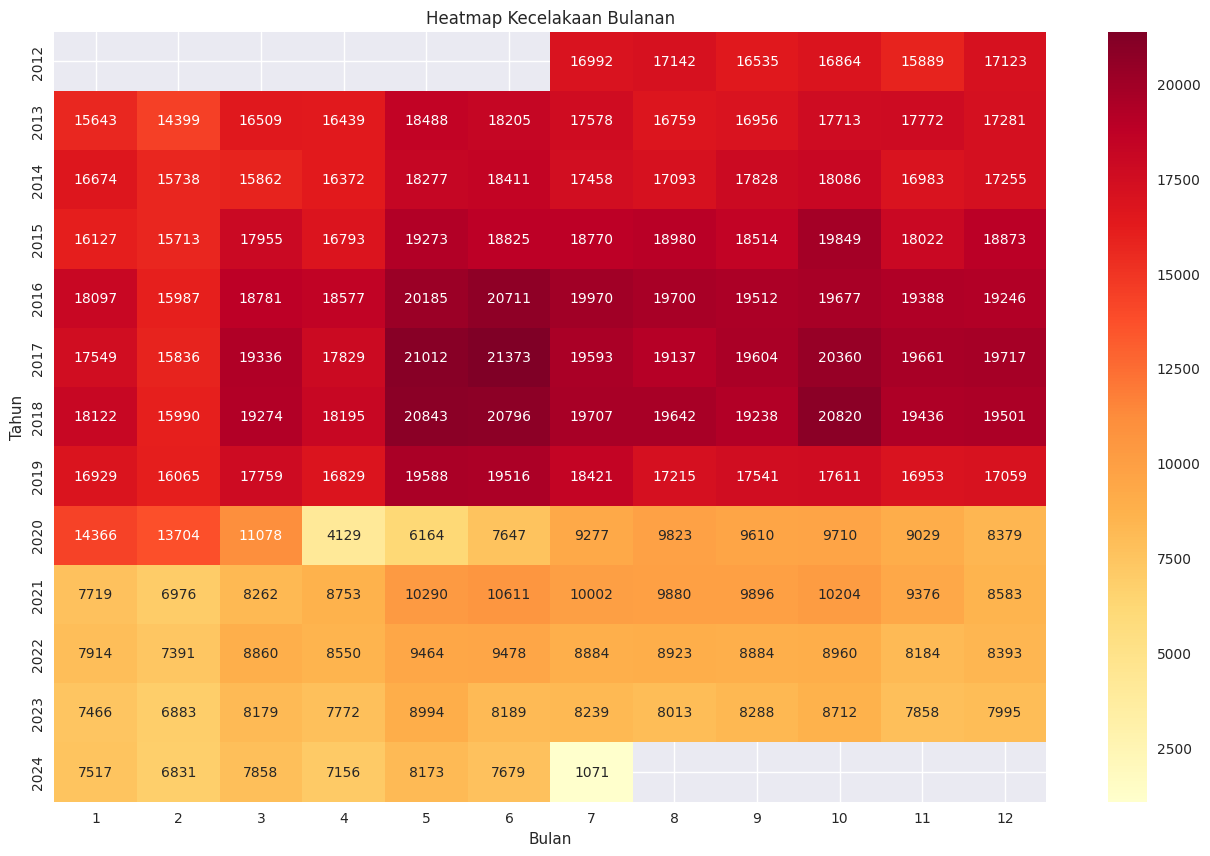

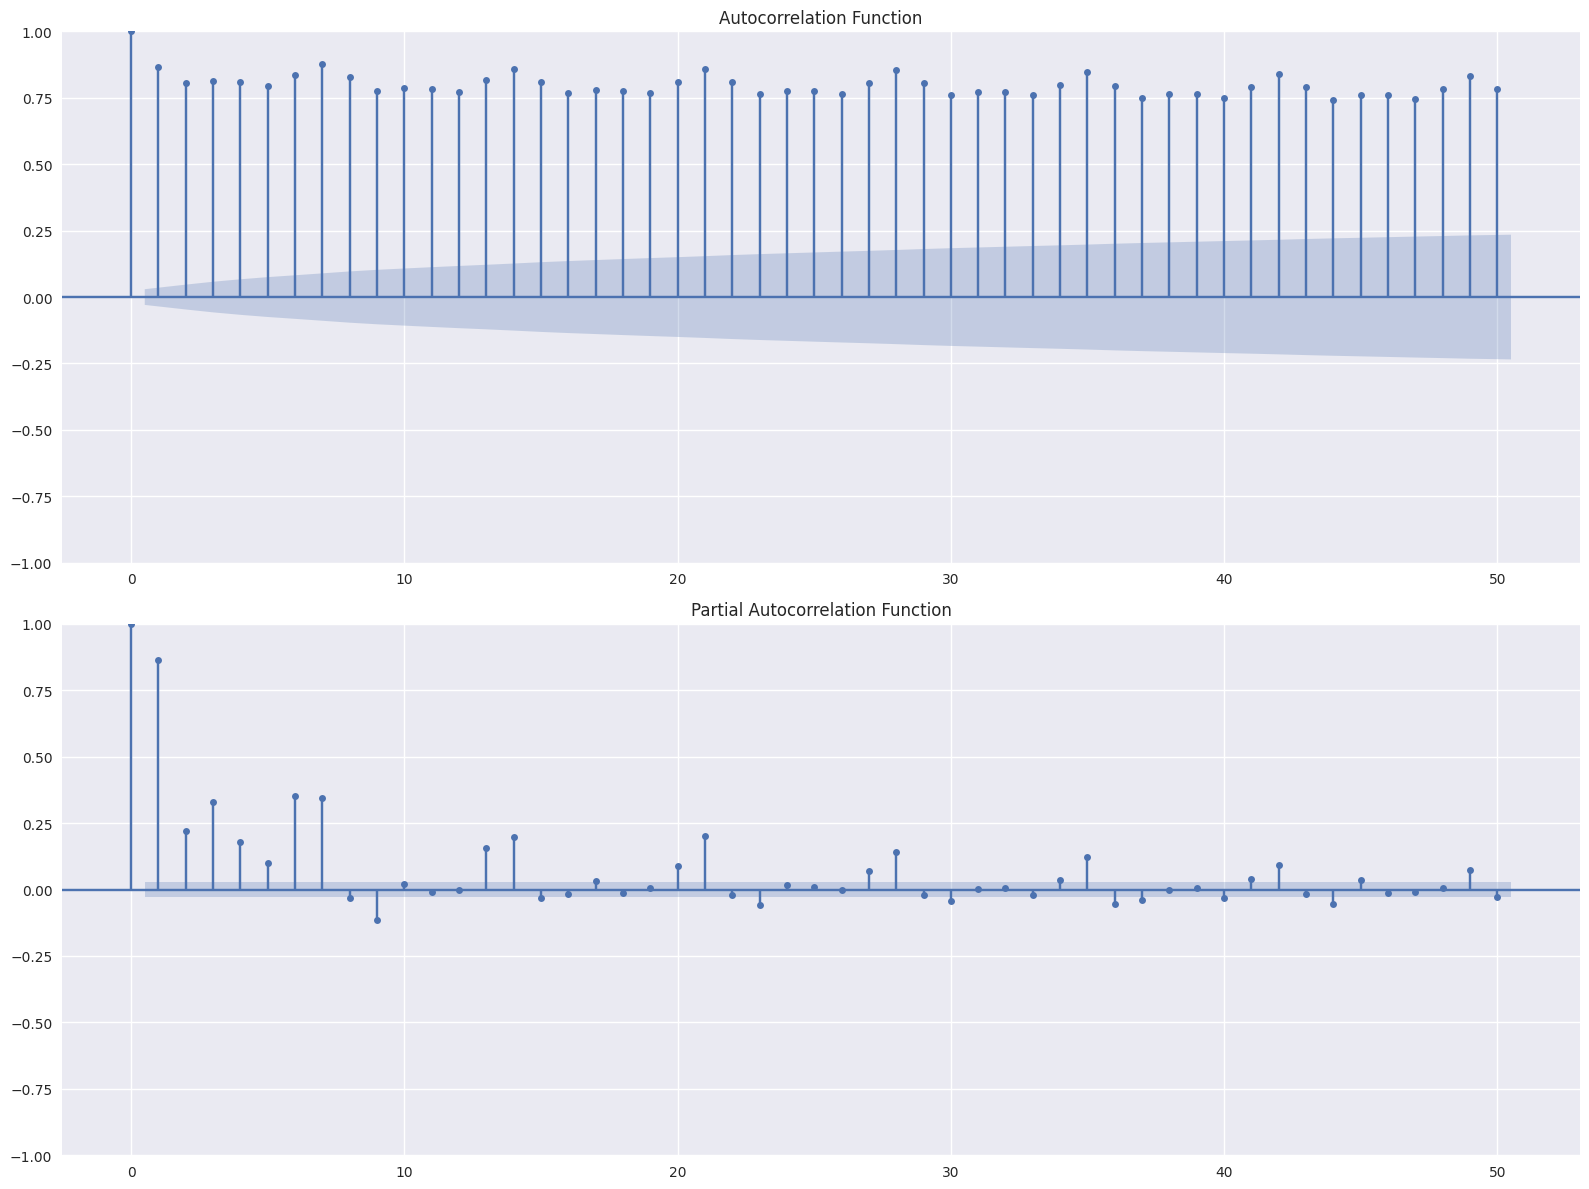

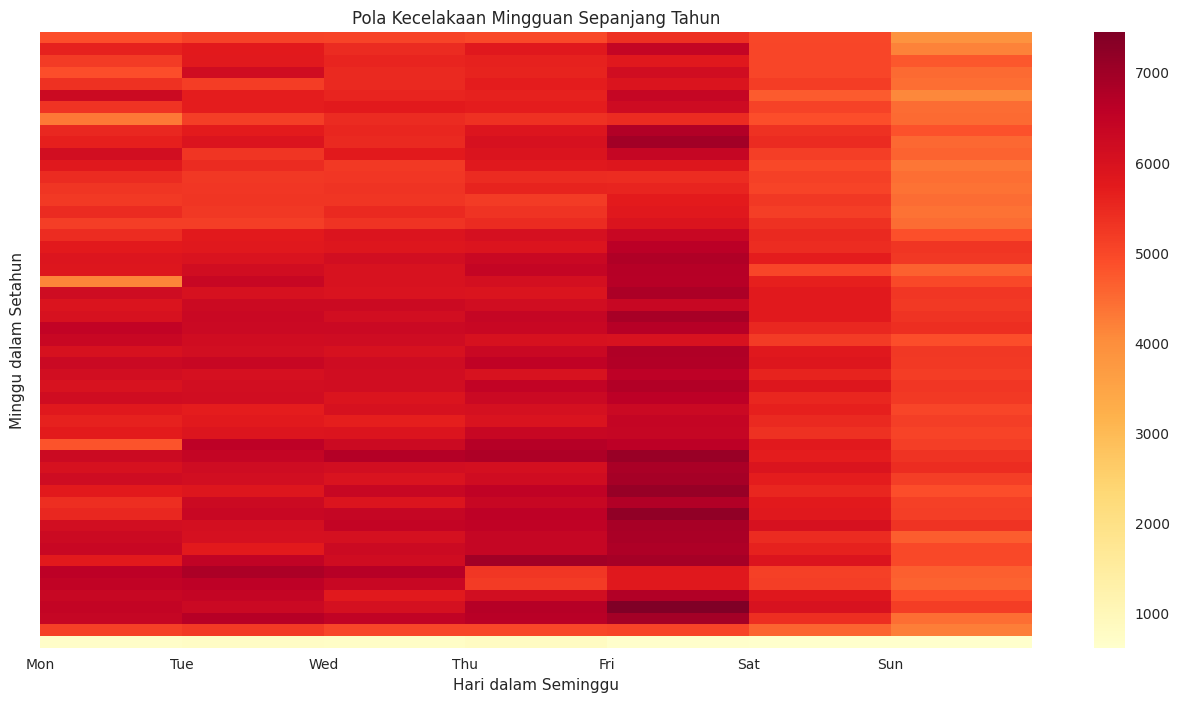

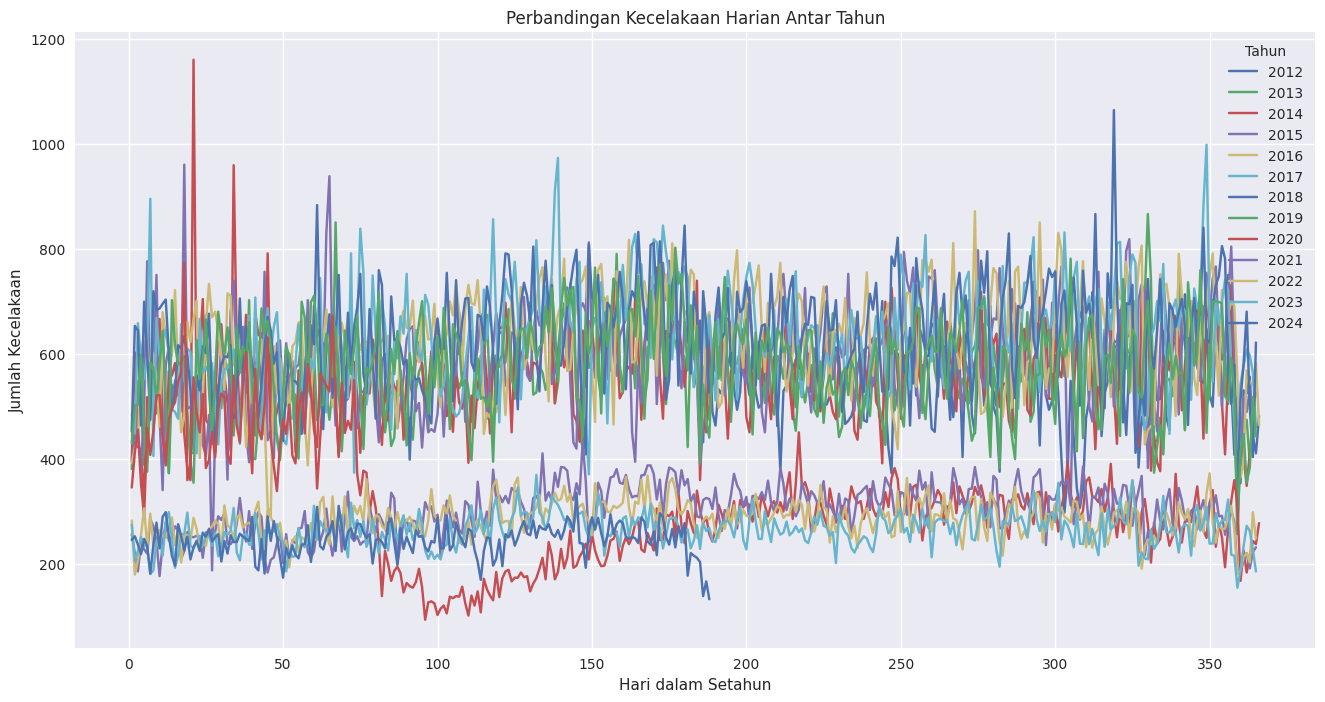

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import calendar

# Asumsikan df adalah DataFrame Anda
# df = pd.read_csv('your_data.csv')

# Konversi CRASH DATE ke datetime
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# 1. Tren Kecelakaan Harian dengan Rolling Average
daily_crashes = df.groupby('CRASH DATE').size().reset_index(name='count')
daily_crashes.set_index('CRASH DATE', inplace=True)

plt.figure(figsize=(16, 8))
plt.plot(daily_crashes.index, daily_crashes['count'], label='Daily Crashes', alpha=0.5)
plt.plot(daily_crashes.index, daily_crashes['count'].rolling(window=30).mean(), label='30-day Moving Average', linewidth=2)
plt.title('Tren Kecelakaan Harian dengan 30-hari Rolling Average')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kecelakaan')
plt.legend()
plt.show()

# 2. Dekomposisi Time Series
weekly_crashes = daily_crashes.resample('W').sum()
decomposition = seasonal_decompose(weekly_crashes, model='additive', period=52)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 20))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

# 3. Heatmap Kecelakaan Bulanan
df['Year'] = df['CRASH DATE'].dt.year
df['Month'] = df['CRASH DATE'].dt.month
monthly_crashes = df.groupby(['Year', 'Month']).size().unstack()

plt.figure(figsize=(16, 10))
sns.heatmap(monthly_crashes, cmap='YlOrRd', annot=True, fmt='g')
plt.title('Heatmap Kecelakaan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Tahun')
plt.show()

# 4. Autocorrelation dan Partial Autocorrelation
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))
plot_acf(daily_crashes['count'], ax=ax1, lags=50)
ax1.set_title('Autocorrelation Function')
plot_pacf(daily_crashes['count'], ax=ax2, lags=50)
ax2.set_title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

# 5. Pola Kecelakaan Mingguan
df['Day of Week'] = df['CRASH DATE'].dt.dayofweek
df['Week of Year'] = df['CRASH DATE'].dt.isocalendar().week
weekly_pattern = df.groupby(['Week of Year', 'Day of Week']).size().unstack()

plt.figure(figsize=(16, 8))
sns.heatmap(weekly_pattern, cmap='YlOrRd')
plt.title('Pola Kecelakaan Mingguan Sepanjang Tahun')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Minggu dalam Setahun')
plt.yticks(range(0, 53, 4))
plt.xticks(range(7), calendar.day_abbr)
plt.show()

# 6. Perbandingan Tahun ke Tahun
yearly_comparison = df.groupby([df['CRASH DATE'].dt.dayofyear, df['CRASH DATE'].dt.year]).size().unstack()

plt.figure(figsize=(16, 8))
for year in yearly_comparison.columns:
    plt.plot(yearly_comparison.index, yearly_comparison[year], label=str(year))
plt.title('Perbandingan Kecelakaan Harian Antar Tahun')
plt.xlabel('Hari dalam Setahun')
plt.ylabel('Jumlah Kecelakaan')
plt.legend(title='Tahun')
plt.show()

In [18]:
print(df.columns)

Index(['CRASH DATE', 'CRASH TIME', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
       'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
       'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
       'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
       'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5', 'CRASH DATE_encoded', 'CRASH TIME_encoded',
       'BOROUGH_BRONX', 'BOROUGH_BROOKLYN', 'BOROUGH_MANHATTAN',
       'BOROUGH_QUEENS', 'BOROUGH_STATEN ISLAND', 'BOROUGH_Unknown',
       'ZIP CODE_encoded', 'LATITUDE_normalized', 'LONGITUDE_normalized',
  

In [28]:
df.head()

CRASH DATE CRASH TIME  ZIP CODE   LATITUDE  LONGITUDE  \
datetime                                                         
NaT      2021-09-11        NaT       NaN  40.720660 -73.927239   
NaT      2022-03-26        NaT       NaN  40.720660 -73.927239   
NaT      2022-06-29        NaT       NaN  40.720660 -73.927239   
NaT      2021-09-11        NaT   11208.0  40.667202 -73.866500   
NaT      2021-12-14        NaT   11233.0  40.683304 -73.917274   

                         LOCATION           ON STREET NAME CROSS STREET NAME  \
datetime                                                                       
NaT                       Unknown    WHITESTONE EXPRESSWAY         20 AVENUE   
NaT                       Unknown  QUEENSBORO BRIDGE UPPER           Unknown   
NaT                       Unknown       THROGS NECK BRIDGE           Unknown   
NaT         (40.667202, -73.8665)                  Unknown           Unknown   
NaT       (40.683304, -73.917274)          SARATOGA AVENUE    DECATUR STREET   

                  OFF STREET NAME  NUMBER OF PERSONS INJURED  ...  \
datetime                                                      ...   
NaT                       Unknown                        2.0  ...   
NaT                       Unknown                        1.0  ...   
NaT                       Unknown                        0.0  ...   
NaT       1211      LORING AVENUE                        0.0  ...   
NaT                       Unknown                        0.0  ...   

          CONTRIBUTING FACTOR VEHICLE 3  CONTRIBUTING FACTOR VEHICLE 4  \
datetime                                                                 
NaT                             Unknown                        Unknown   
NaT                             Unknown                        Unknown   
NaT                             Unknown                        Unknown   
NaT                             Unknown                        Unknown   
NaT                             Unknown                        Unknown   

          CONTRIBUTING FACTOR VEHICLE 5  COLLISION_ID  VEHICLE TYPE CODE 1  \
datetime                                                                     
NaT                             Unknown       4455765                Sedan   
NaT                             Unknown       4513547                Sedan   
NaT                             Unknown       4541903                Sedan   
NaT                             Unknown       4456314                Sedan   
NaT                             Unknown       4486609              Unknown   

          VEHICLE TYPE CODE 2  VEHICLE TYPE CODE 3 VEHICLE TYPE CODE 4  \
datetime                                                                 
NaT                     Sedan              Unknown             Unknown   
NaT                   Unknown              Unknown             Unknown   
NaT             Pick-up Truck              Unknown             Unknown   
NaT                   Unknown              Unknown             Unknown   
NaT                   Unknown              Unknown             Unknown   

         VEHICLE TYPE CODE 5 TOTAL_VICTIMS  
datetime                                    
NaT                  Unknown           4.0  
NaT                  Unknown           2.0  
NaT                  Unknown           0.0  
NaT                  Unknown           0.0  
NaT                  Unknown           0.0  

[5 rows x 29 columns]

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Asumsikan df adalah DataFrame Anda
# df = ...

# Kolom yang digunakan
columns = [
    'CRASH DATE', 'CRASH TIME', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
    'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
    'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
    'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
    'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
    'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID',
    'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3',
    'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'
]

# Filter df menggunakan kolom yang diinginkan
df = df[columns]

# Pastikan semua nilai dalam kolom 'CRASH TIME' adalah string
df['CRASH TIME'] = df['CRASH TIME'].astype(str)

# Periksa nilai yang tidak sesuai format hh:mm:ss
invalid_times = df[~df['CRASH TIME'].str.match(r'^\d{2}:\d{2}:\d{2}$')]
print(f"Invalid times: {invalid_times}")

# Tangani nilai yang tidak sesuai format hh:mm:ss (misalnya, ganti dengan median waktu)
df['CRASH TIME'] = pd.to_timedelta(df['CRASH TIME'], errors='coerce')
median_time = df['CRASH TIME'].median()
df['CRASH TIME'] = df['CRASH TIME'].fillna(median_time)

# Gabungkan 'CRASH DATE' dan 'CRASH TIME'
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], errors='coerce')
median_date = df['CRASH DATE'].median()
df['CRASH DATE'] = df['CRASH DATE'].fillna(median_date)
df['datetime'] = df['CRASH DATE'] + df['CRASH TIME']

# Set datetime sebagai index
df = df.set_index('datetime')

# Hitung total korban
df['TOTAL_VICTIMS'] = df['NUMBER OF PERSONS INJURED'] + df['NUMBER OF PERSONS KILLED'] + \
                      df['NUMBER OF PEDESTRIANS INJURED'] + df['NUMBER OF PEDESTRIANS KILLED'] + \
                      df['NUMBER OF CYCLIST INJURED'] + df['NUMBER OF CYCLIST KILLED'] + \
                      df['NUMBER OF MOTORIST INJURED'] + df['NUMBER OF MOTORIST KILLED']

# Agregasi data harian
daily_data = df['TOTAL_VICTIMS'].resample('D').sum().reset_index()
daily_data.columns = ['date', 'total_victims']

# Pastikan daily_data tidak kosong setelah resampling
if daily_data.empty:
    raise ValueError("daily_data is empty after resampling.")

# Normalisasi data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily_data['total_victims'].values.reshape(-1, 1))

# Fungsi untuk membuat dataset dengan time steps
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# Membuat dataset dengan time steps
time_steps = 7  # Menggunakan data 7 hari sebelumnya untuk memprediksi hari berikutnya
X, y = create_dataset(scaled_data, time_steps)

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input untuk LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Membangun model LSTM
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Melatih model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Evaluasi model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Membuat prediksi
test_predictions = model.predict(X_test)

# Inverse transform untuk mendapatkan nilai asli
test_predictions = scaler.inverse_transform(test_predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualisasi hasil
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.title('LSTM Time Series Forecasting - Total Victims')
plt.xlabel('Time')
plt.ylabel('Total Number of Victims')
plt.legend()
plt.show()

# Forecasting untuk 30 hari ke depan
last_sequence = scaled_data[-time_steps:]
future_predictions = []

for _ in range(30):
    next_pred = model.predict(last_sequence.reshape(1, time_steps, 1))
    future_predictions.append(next_pred[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = next_pred

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Visualisasi prediksi masa depan
plt.figure(figsize=(12, 6))
plt.plot(daily_data['total_victims'].values[-100:], label='Historical Data')
plt.plot(range(len(daily_data), len(daily_data) + 30), future_predictions, label='Future Predictions')
plt.title('LSTM Time Series Forecasting - Future 30 Days')
plt.xlabel('Time')
plt.ylabel('Total Number of Victims')
plt.legend()
plt.show()

/tmp/ipykernel_3741/2611464687.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CRASH TIME'] = df['CRASH TIME'].astype(str)


Invalid times:         CRASH DATE CRASH TIME  ZIP CODE   LATITUDE  LONGITUDE  \
0       2021-09-11       2:39       NaN  40.720660 -73.927239   
1       2022-03-26      11:45       NaN  40.720660 -73.927239   
2       2022-06-29       6:55       NaN  40.720660 -73.927239   
3       2021-09-11       9:35   11208.0  40.667202 -73.866500   
4       2021-12-14       8:13   11233.0  40.683304 -73.917274   
...            ...        ...       ...        ...        ...   
2102127 2024-07-06      13:44   11207.0  40.669834 -73.895360   
2102128 2024-07-05      14:40   11234.0  40.613120 -73.917450   
2102129 2024-07-04       0:30   11209.0  40.631203 -74.020660   
2102130 2024-07-04      22:21   10012.0  40.720320 -73.994050   
2102131 2024-07-06       0:09   11222.0  40.720150 -73.937830   

                        LOCATION           ON STREET NAME  CROSS STREET NAME  \
0                        Unknown    WHITESTONE EXPRESSWAY          20 AVENUE   
1                        Unknown  QUEENSBORO

/tmp/ipykernel_3741/2611464687.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CRASH TIME'] = pd.to_timedelta(df['CRASH TIME'], errors='coerce')
/usr/local/lib/python3.11/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/tmp/ipykernel_3741/2611464687.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CRASH TIME'] = df['CRASH TIME'].fillna(median_time)
/tmp/ipykernel_3741/2611464687.py:43: SettingWithCopy

AttributeError: 'NaTType' object has no attribute 'normalize'

In [21]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Asumsikan df adalah DataFrame Anda
# df = ...

# Kolom yang digunakan
columns = [
    'CRASH DATE', 'CRASH TIME', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
    'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
    'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
    'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
    'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
    'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
    'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
    'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
    'CONTRIBUTING FACTOR VEHICLE 5', 'COLLISION_ID',
    'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3',
    'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'
]

# Filter df menggunakan kolom yang diinginkan
df = df[columns]

# Pastikan semua nilai dalam kolom 'CRASH TIME' adalah string
df['CRASH TIME'] = df['CRASH TIME'].astype(str)

# Periksa nilai yang tidak sesuai format hh:mm:ss
invalid_times = df[~df['CRASH TIME'].str.match(r'^\d{2}:\d{2}:\d{2}$')]
print(f"Invalid times: {invalid_times}")

# Tangani nilai yang tidak sesuai format hh:mm:ss (misalnya, ganti dengan median waktu)
df['CRASH TIME'] = pd.to_timedelta(df['CRASH TIME'], errors='coerce')
median_time = df['CRASH TIME'].median()
df['CRASH TIME'] = df['CRASH TIME'].fillna(median_time)

# Gabungkan 'CRASH DATE' dan 'CRASH TIME'
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], errors='coerce')
median_date = df['CRASH DATE'].median()
df['CRASH DATE'] = df['CRASH DATE'].fillna(median_date)
df['datetime'] = df['CRASH DATE'] + df['CRASH TIME']

# Set datetime sebagai index
df = df.set_index('datetime')

# Hitung total korban
df['TOTAL_VICTIMS'] = df['NUMBER OF PERSONS INJURED'] + df['NUMBER OF PERSONS KILLED'] + \
                      df['NUMBER OF PEDESTRIANS INJURED'] + df['NUMBER OF PEDESTRIANS KILLED'] + \
                      df['NUMBER OF CYCLIST INJURED'] + df['NUMBER OF CYCLIST KILLED'] + \
                      df['NUMBER OF MOTORIST INJURED'] + df['NUMBER OF MOTORIST KILLED']

# Agregasi data harian
daily_data = df['TOTAL_VICTIMS'].resample('D').sum().reset_index()
daily_data.columns = ['date', 'total_victims']

# Pastikan daily_data tidak kosong setelah resampling
if daily_data.empty:
    raise ValueError("daily_data is empty after resampling.")

# Plot data untuk melihat tren
plt.figure(figsize=(12, 6))
plt.plot(daily_data['date'], daily_data['total_victims'], label='Daily Total Victims')
plt.title('Daily Total Victims Over Time')
plt.xlabel('Date')
plt.ylabel('Total Victims')
plt.legend()
plt.show()

# Membuat model SARIMA
p = 1  # Autoregressive order
d = 1  # Differencing order
q = 1  # Moving average order
seasonal_order = (1, 1, 1, 7)  # Seasonal component with weekly seasonality

model = SARIMAX(daily_data['total_victims'], order=(p, d, q), seasonal_order=seasonal_order)
sarima_result = model.fit(disp=False)

# Forecasting untuk 30 hari ke depan
forecast = sarima_result.get_forecast(steps=30)
forecast_index = pd.date_range(start=daily_data['date'].iloc[-1] + pd.Timedelta(days=1), periods=30, freq='D')
forecast_df = pd.DataFrame({'date': forecast_index, 'forecast': forecast.predicted_mean})

# Plot hasil forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['date'], daily_data['total_victims'], label='Historical Data')
plt.plot(forecast_df['date'], forecast_df['forecast'], label='Forecast', color='red')
plt.title('SARIMA Time Series Forecasting - Future 30 Days')
plt.xlabel('Date')
plt.ylabel('Total Number of Victims')
plt.legend()
plt.show()

/tmp/ipykernel_3741/2143260662.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CRASH TIME'] = df['CRASH TIME'].astype(str)


Invalid times:          CRASH DATE CRASH TIME  ZIP CODE   LATITUDE  LONGITUDE  \
datetime                                                         
NaT      2021-09-11        NaT       NaN  40.720660 -73.927239   
NaT      2022-03-26        NaT       NaN  40.720660 -73.927239   
NaT      2022-06-29        NaT       NaN  40.720660 -73.927239   
NaT      2021-09-11        NaT   11208.0  40.667202 -73.866500   
NaT      2021-12-14        NaT   11233.0  40.683304 -73.917274   
...             ...        ...       ...        ...        ...   
NaT      2024-07-06        NaT   11207.0  40.669834 -73.895360   
NaT      2024-07-05        NaT   11234.0  40.613120 -73.917450   
NaT      2024-07-04        NaT   11209.0  40.631203 -74.020660   
NaT      2024-07-04        NaT   10012.0  40.720320 -73.994050   
NaT      2024-07-06        NaT   11222.0  40.720150 -73.937830   

                         LOCATION           ON STREET NAME  CROSS STREET NAME  \
datetime                                     

/tmp/ipykernel_3741/2143260662.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CRASH TIME'] = pd.to_timedelta(df['CRASH TIME'], errors='coerce')
/usr/local/lib/python3.11/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/tmp/ipykernel_3741/2143260662.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CRASH TIME'] = df['CRASH TIME'].fillna(median_time)
/tmp/ipykernel_3741/2143260662.py:40: SettingWithCopy

AttributeError: 'NaTType' object has no attribute 'normalize'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import calendar

# Asumsikan df adalah DataFrame Anda
# df = pd.read_csv('your_data.csv')

# Konversi CRASH DATE ke datetime
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

# 1. Tren Kecelakaan Harian dengan Rolling Average
daily_crashes = df.groupby('CRASH DATE').size().reset_index(name='count')
daily_crashes.set_index('CRASH DATE', inplace=True)

plt.figure(figsize=(16, 8))
plt.plot(daily_crashes.index, daily_crashes['count'], label='Daily Crashes', alpha=0.5)
plt.plot(daily_crashes.index, daily_crashes['count'].rolling(window=30).mean(), label='30-day Moving Average', linewidth=2)
plt.title('Tren Kecelakaan Harian dengan 30-hari Rolling Average')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kecelakaan')
plt.legend()
plt.show()

# 2. Dekomposisi Time Series
weekly_crashes = daily_crashes.resample('W').sum()
decomposition = seasonal_decompose(weekly_crashes, model='additive', period=52)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 20))
decomposition.observed.plot(ax=ax1)
ax1.set_title('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_title('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_title('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_title('Residual')
plt.tight_layout()
plt.show()

# 3. Heatmap Kecelakaan Bulanan
df['Year'] = df['CRASH DATE'].dt.year
df['Month'] = df['CRASH DATE'].dt.month
monthly_crashes = df.groupby(['Year', 'Month']).size().unstack()

plt.figure(figsize=(16, 10))
sns.heatmap(monthly_crashes, cmap='YlOrRd', annot=True, fmt='g')
plt.title('Heatmap Kecelakaan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Tahun')
plt.show()

# 4. Autocorrelation dan Partial Autocorrelation
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))
plot_acf(daily_crashes['count'], ax=ax1, lags=50)
ax1.set_title('Autocorrelation Function')
plot_pacf(daily_crashes['count'], ax=ax2, lags=50)
ax2.set_title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

# 5. Pola Kecelakaan Mingguan
df['Day of Week'] = df['CRASH DATE'].dt.dayofweek
df['Week of Year'] = df['CRASH DATE'].dt.isocalendar().week
weekly_pattern = df.groupby(['Week of Year', 'Day of Week']).size().unstack()

plt.figure(figsize=(16, 8))
sns.heatmap(weekly_pattern, cmap='YlOrRd')
plt.title('Pola Kecelakaan Mingguan Sepanjang Tahun')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Minggu dalam Setahun')
plt.yticks(range(0, 53, 4))
plt.xticks(range(7), calendar.day_abbr)
plt.show()

# 6. Perbandingan Tahun ke Tahun
yearly_comparison = df.groupby([df['CRASH DATE'].dt.dayofyear, df['CRASH DATE'].dt.year]).size().unstack()

plt.figure(figsize=(16, 8))
for year in yearly_comparison.columns:
    plt.plot(yearly_comparison.index, yearly_comparison[year], label=str(year))
plt.title('Perbandingan Kecelakaan Harian Antar Tahun')
plt.xlabel('Hari dalam Setahun')
plt.ylabel('Jumlah Kecelakaan')
plt.legend(title='Tahun')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Asumsikan df adalah DataFrame Anda
# df = pd.read_csv('your_data.csv')

features = ['LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
            'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
            'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
            'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED']

X = df[features]

# Buat target variabel (misalnya, klasifikasi tingkat keparahan)
df['Total Victims'] = df['NUMBER OF PERSONS INJURED'].fillna(0) + df['NUMBER OF PERSONS KILLED'].fillna(0)
df['Severity'] = pd.cut(df['Total Victims'], bins=[0, 1, 3, 5, float('inf')], 
                        labels=[0, 1, 2, 3])

# Periksa jumlah nilai NaN dalam y
print("Jumlah nilai NaN dalam Severity:", df['Severity'].isna().sum())

# Hapus baris dengan nilai NaN dalam Severity
df_clean = df.dropna(subset=['Severity'])
X = df_clean[features]
y = df_clean['Severity']

# Pisahkan data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Melatih dan mengevaluasi model
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("\n")

# Menampilkan hasil perbandingan
for name, accuracy in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{name}: {accuracy:.4f}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
import pickle

# ... (kode sebelumnya tetap sama sampai pemisahan data)

# Pisahkan data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model dengan parameter untuk mencegah overfitting
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Neural Network': MLPClassifier(random_state=42)
}

# Parameter grid untuk pencarian
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']
    },
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'Neural Network': {
        'hidden_layer_sizes': [(50,), (100,)],
        'alpha': [0.0001, 0.001],
        'learning_rate': ['constant', 'adaptive']
    }
}

# Melatih dan mengevaluasi model
best_model = None
best_accuracy = 0

for name, model in models.items():
    print(f"Training {name}...")
    
    # Menggunakan GridSearchCV untuk mencari parameter terbaik
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    best_model_params = grid_search.best_estimator_
    
    # Menggunakan cross-validation untuk evaluasi yang lebih robust
    cv_scores = cross_val_score(best_model_params, X_train_scaled, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)
    
    print(f"{name} Mean CV Accuracy: {mean_cv_score:.4f}")
    print(f"Best parameters: {grid_search.best_params_}")
    
    # Evaluasi pada test set
    y_pred = best_model_params.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Test Accuracy: {test_accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("\n")
    
    if mean_cv_score > best_accuracy:
        best_accuracy = mean_cv_score
        best_model = (name, best_model_params)

print(f"Best model: {best_model[0]} with mean CV accuracy: {best_accuracy:.4f}")

# Simpan model terbaik ke dalam file pickle
best_model_name, best_model_instance = best_model
with open(f'best_model_{best_model_name.replace(" ", "_").lower()}.pkl', 'wb') as file:
    pickle.dump({
        'model': best_model_instance,
        'imputer': imputer,
        'scaler': scaler
    }, file)

print(f"Best model saved as 'best_model_{best_model_name.replace(' ', '_').lower()}.pkl'")

# Fungsi untuk memuat model dan melakukan prediksi tetap sama

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import pickle
import numpy as np
import os

# Fungsi untuk load model dengan error handling
def load_pickle(file_path):
    try:
        with open(file_path, 'rb') as file:
            return pickle.load(file)
    except FileNotFoundError:
        print(f"File tidak ditemukan: {file_path}")
    except Exception as e:
        print(f"Error saat loading file {file_path}: {e}")
    return None

# Path ke file-file pickle
base_path = 'ml1/model'
model_path = os.path.join(base_path, 'best_model_gradient_boosting.pkl')
scaler_path = os.path.join(base_path, 'scaler.pkl')
imputer_path = os.path.join(base_path, 'imputer.pkl')

# Load model dan preprocessor
print("Mencoba load model dan preprocessor...")
model = load_pickle(model_path)
scaler = load_pickle(scaler_path)
imputer = load_pickle(imputer_path)

if model is None or scaler is None or imputer is None:
    print("Gagal load salah satu atau lebih komponen yang diperlukan.")
else:
    print("Berhasil load semua komponen.")

    # Membuat widget input
    latitude = widgets.FloatText(description='Latitude')
    longitude = widgets.FloatText(description='Longitude')
    persons_injured = widgets.IntText(description='Orang Terluka')
    persons_killed = widgets.IntText(description='Orang Meninggal')
    pedestrians_injured = widgets.IntText(description='Pejalan Kaki Terluka')
    pedestrians_killed = widgets.IntText(description='Pejalan Kaki Meninggal')
    cyclists_injured = widgets.IntText(description='Pesepeda Terluka')
    cyclists_killed = widgets.IntText(description='Pesepeda Meninggal')
    motorists_injured = widgets.IntText(description='Pengendara Motor Terluka')
    motorists_killed = widgets.IntText(description='Pengendara Motor Meninggal')

    predict_button = widgets.Button(description='Prediksi')
    output = widgets.Output()

    def on_button_clicked(_):
        with output:
            output.clear_output()
            try:
                features = np.array([
                    latitude.value, longitude.value, 
                    persons_injured.value, persons_killed.value,
                    pedestrians_injured.value, pedestrians_killed.value, 
                    cyclists_injured.value, cyclists_killed.value, 
                    motorists_injured.value, motorists_killed.value
                ])
                
                features_imputed = imputer.transform(features.reshape(1, -1))
                features_scaled = scaler.transform(features_imputed)
                prediction = model.predict(features_scaled)[0]
                
                severity_labels = {0: 'Ringan', 1: 'Sedang', 2: 'Berat', 3: 'Sangat Berat'}
                print(f'Prediksi Tingkat Keparahan: {severity_labels[prediction]}')
            except Exception as e:
                print(f"Terjadi error saat melakukan prediksi: {e}")

    predict_button.on_click(on_button_clicked)

    # Menampilkan widget
    print("Menampilkan widget...")
    display(latitude, longitude, persons_injured, persons_killed,
            pedestrians_injured, pedestrians_killed, cyclists_injured,
            cyclists_killed, motorists_injured, motorists_killed,
            predict_button, output)

print("Kode selesai dijalankan.")